## Name- Ranjan Pratap Singh                                                      DS2307

# Student Grades Prediction Project

### Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

 
Predict - CGPA of a student based on different grades in four years.


### Importing the libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import pickle

### Importing Dataset

In [29]:
df = pd.read_csv(r"C:\Users\RANJAN\Downloads\Grades.csv")

### Exploratory Data Analysis(EDA)  ----->

In [30]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


###### our data set is of Student grades prediction that has shape of 571 rows and 43 columns. it tells us about  grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades . Our target variable is CGPA which is of continuous nature . therefore it is a regression problem. so we will use regression models to train and predict the data. 

here we dropped  Seat No. as it does not help in predicitng   

In [31]:
df = df.drop('Seat No.',axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

#### Here we observe our datatypes . 
We observe that  our features have  2 datatypes - object(string) and for target variable we have float64.
#### We can see that there are null values in the variuos columns ,we will check further if there can be more null values by checking for white spaces 

--Checking for duplicated values

In [33]:
df.duplicated().sum()

0

Here we can see that there are no duplicated values

In [34]:

for i in df.columns:
    print(df[i].value_counts())


A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4


#### as we can see there are no white spaces in the  dataset  


In [35]:
df.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

######  here we can observe that there are null values in many columns 
###### for null values--   It is a categorical column and in that too grades are  present so..we will use mode method for filling null values

In [36]:
for column in ['CY-105', 'HS-105/12', 'MT-111', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403','CS-406', 'CS-421', 'CS-414', 'CS-419', 'CS-423', 'CS-412']:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [37]:
df.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

-- we can see that there are  no null values 

In [38]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


-- here we can see only description for CGPA as it has only numerical values

IN OUR TARGET VARIABLE DATA LOOK ALMOST NORMAL AS MEAN IS APPROX TO MEIDIAN WE WILL FURTHER SEE LATER. 

### Data visualisation 

-- UNIVARIATE ANALYSIS

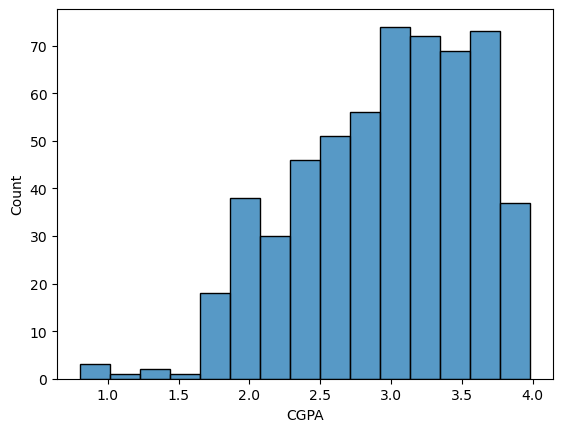

In [39]:
sns.histplot(x='CGPA' , data = df )
plt.show()

here we can observe that most of student have CGPA from 3.0 to 3.8

#### ----- graphs for first year student 

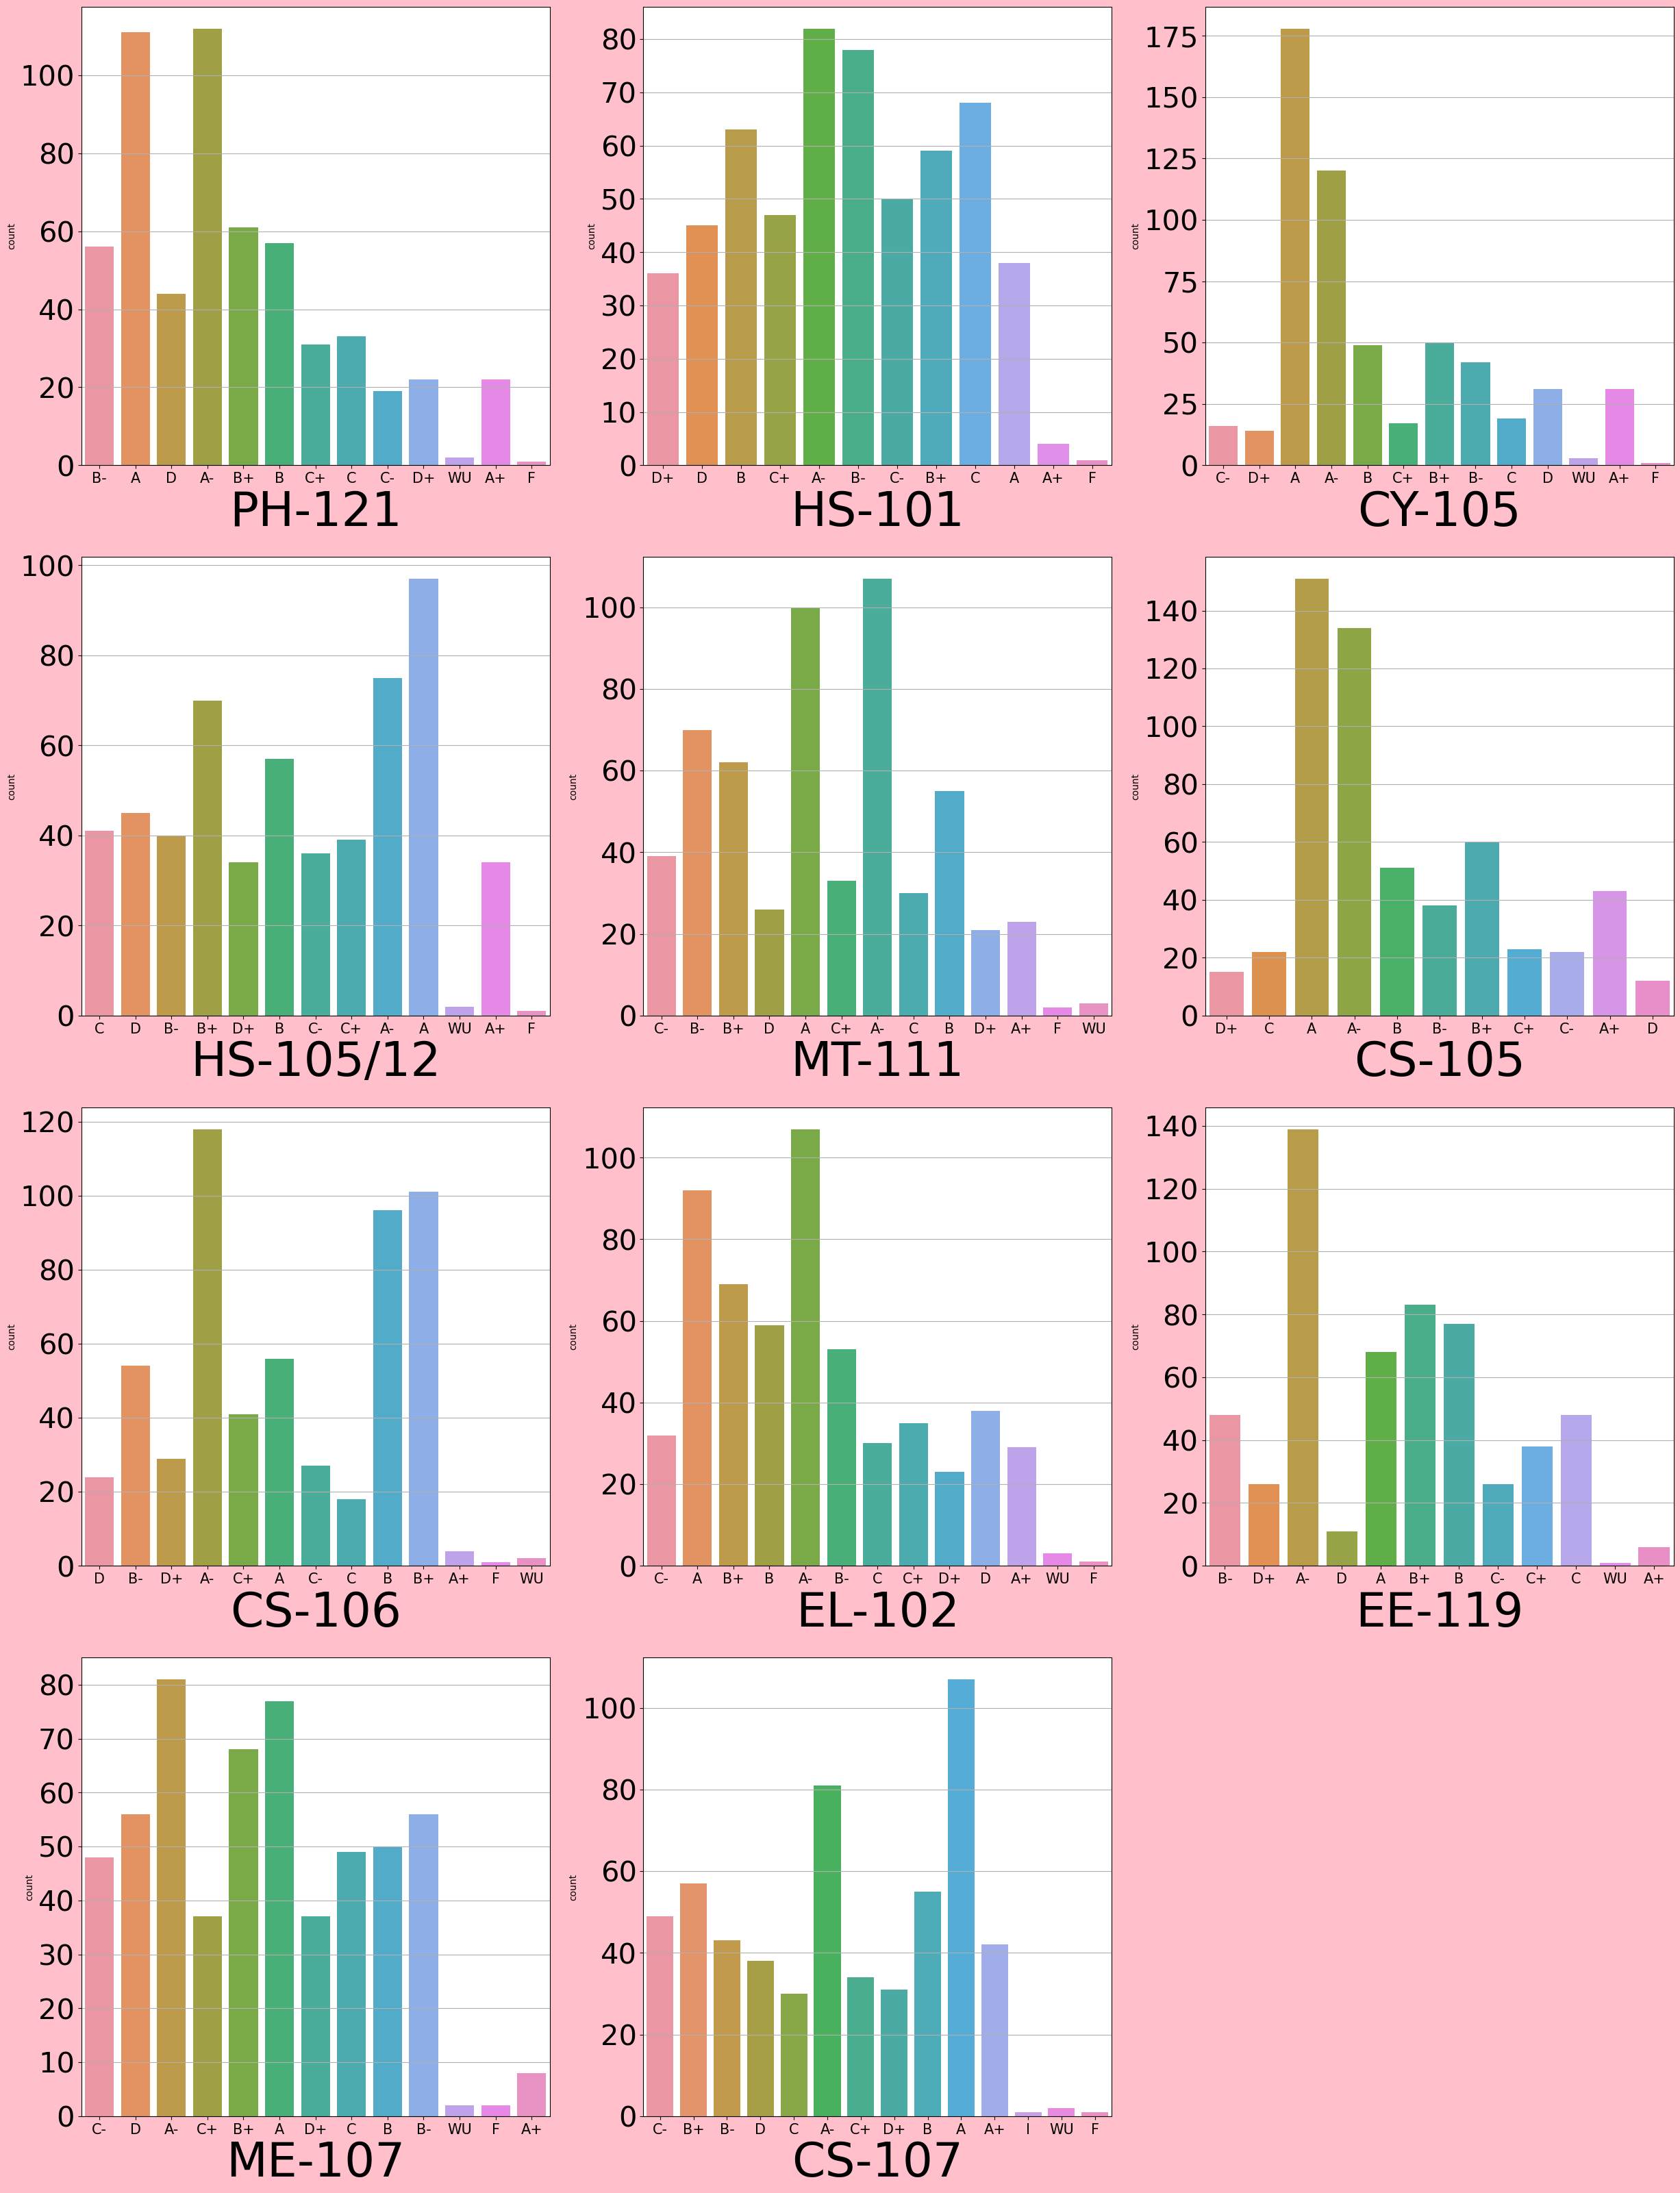

In [41]:
plt.figure(figsize=(30, 40), facecolor="pink")
plotnumber = 1

for i in df: 
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x= df[i] ,data = df  )
        plt.xlabel(i, fontsize=50)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis ='y')
    plotnumber += 1

plt.show()

here we can observe that - 

PH-121 - most student has A and A- and very less student has F

HS-101 - most student has A- ,b-and C and less student has F

CY-105 - most student has A and A- and very less student has F

HS-105/12 -most student has A and A- and B-  and very less student has F

MT-111 - most student has A- and A and less student has F

CS-105 - most student has A and A- and no student has F

CS-106 -most student has B,B- and A- and  very less student has F

EL-102 - most student has A and A- and  very less student has F

EE-119 -  most student has  A- and no student has F

ME-107 -most student has A and A- and B+  and less student has F

CS-107 - most student has A and A- and very less student has F

#### ----- graphs for second year student 

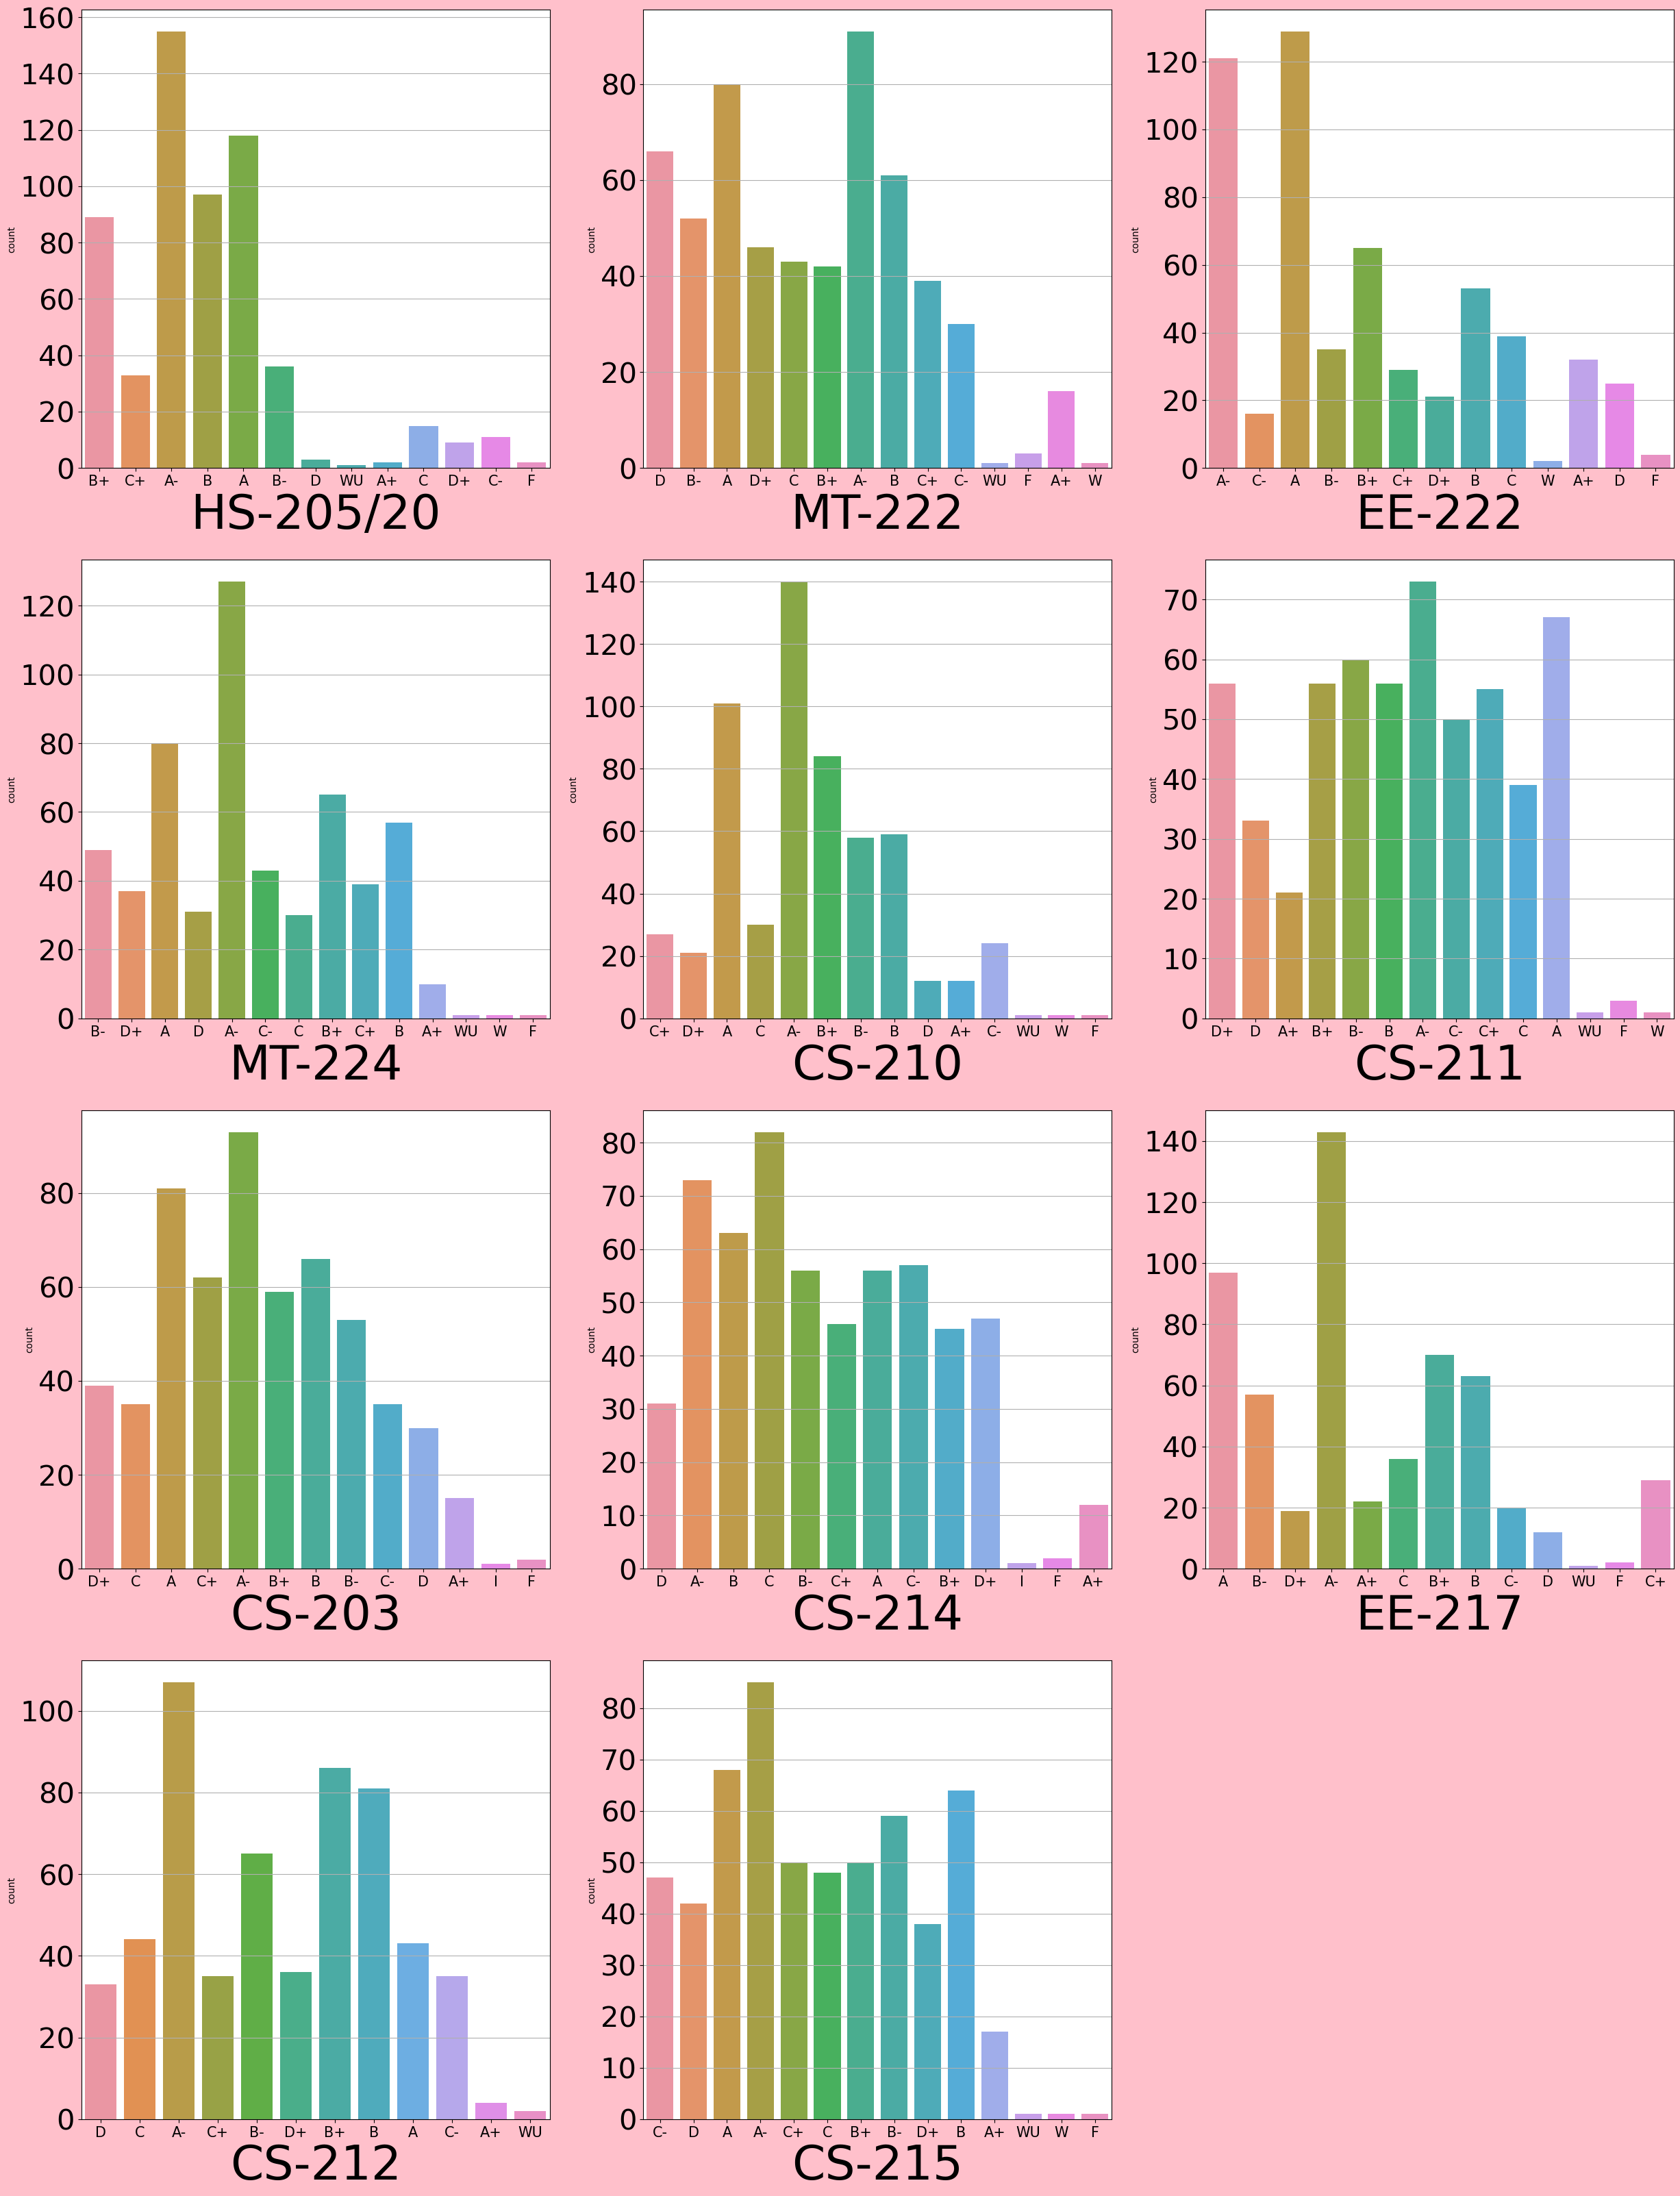

In [15]:
plt.figure(figsize=(30, 40), facecolor="pink")
plotnumber = 1
for i in df.columns:
    if 11 < plotnumber <= 22:  
        ax = plt.subplot(4, 3, plotnumber - 11)  
        sns.countplot(x=df[i], data=df)
        plt.xlabel(i, fontsize=50)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis ='y')
    plotnumber += 1

plt.show()


Here we can observe -

HS-205/20 - most student has A and A- and very less student has F

MT-222  -  most student has A and A- and very less student has F

EE-222  - most student has A and A- and  less student has F

MT-224 - most student has A and A- and very less student has F

CS-210  - most student has A and A- and very less student has F

CS-211  - most student has A and A- and  comparatively more student have F

CS-203  - most student has A and A- and  less student has F

CS-214  -most student has A- and C and less student has F

EE-217 - most student has A and A- and very less student has F

CS-212  - most student has A- , B and B-and no student has F

CS-215 - most student has A , A- and B and very less student has F

#### ----- graphs for third year student 

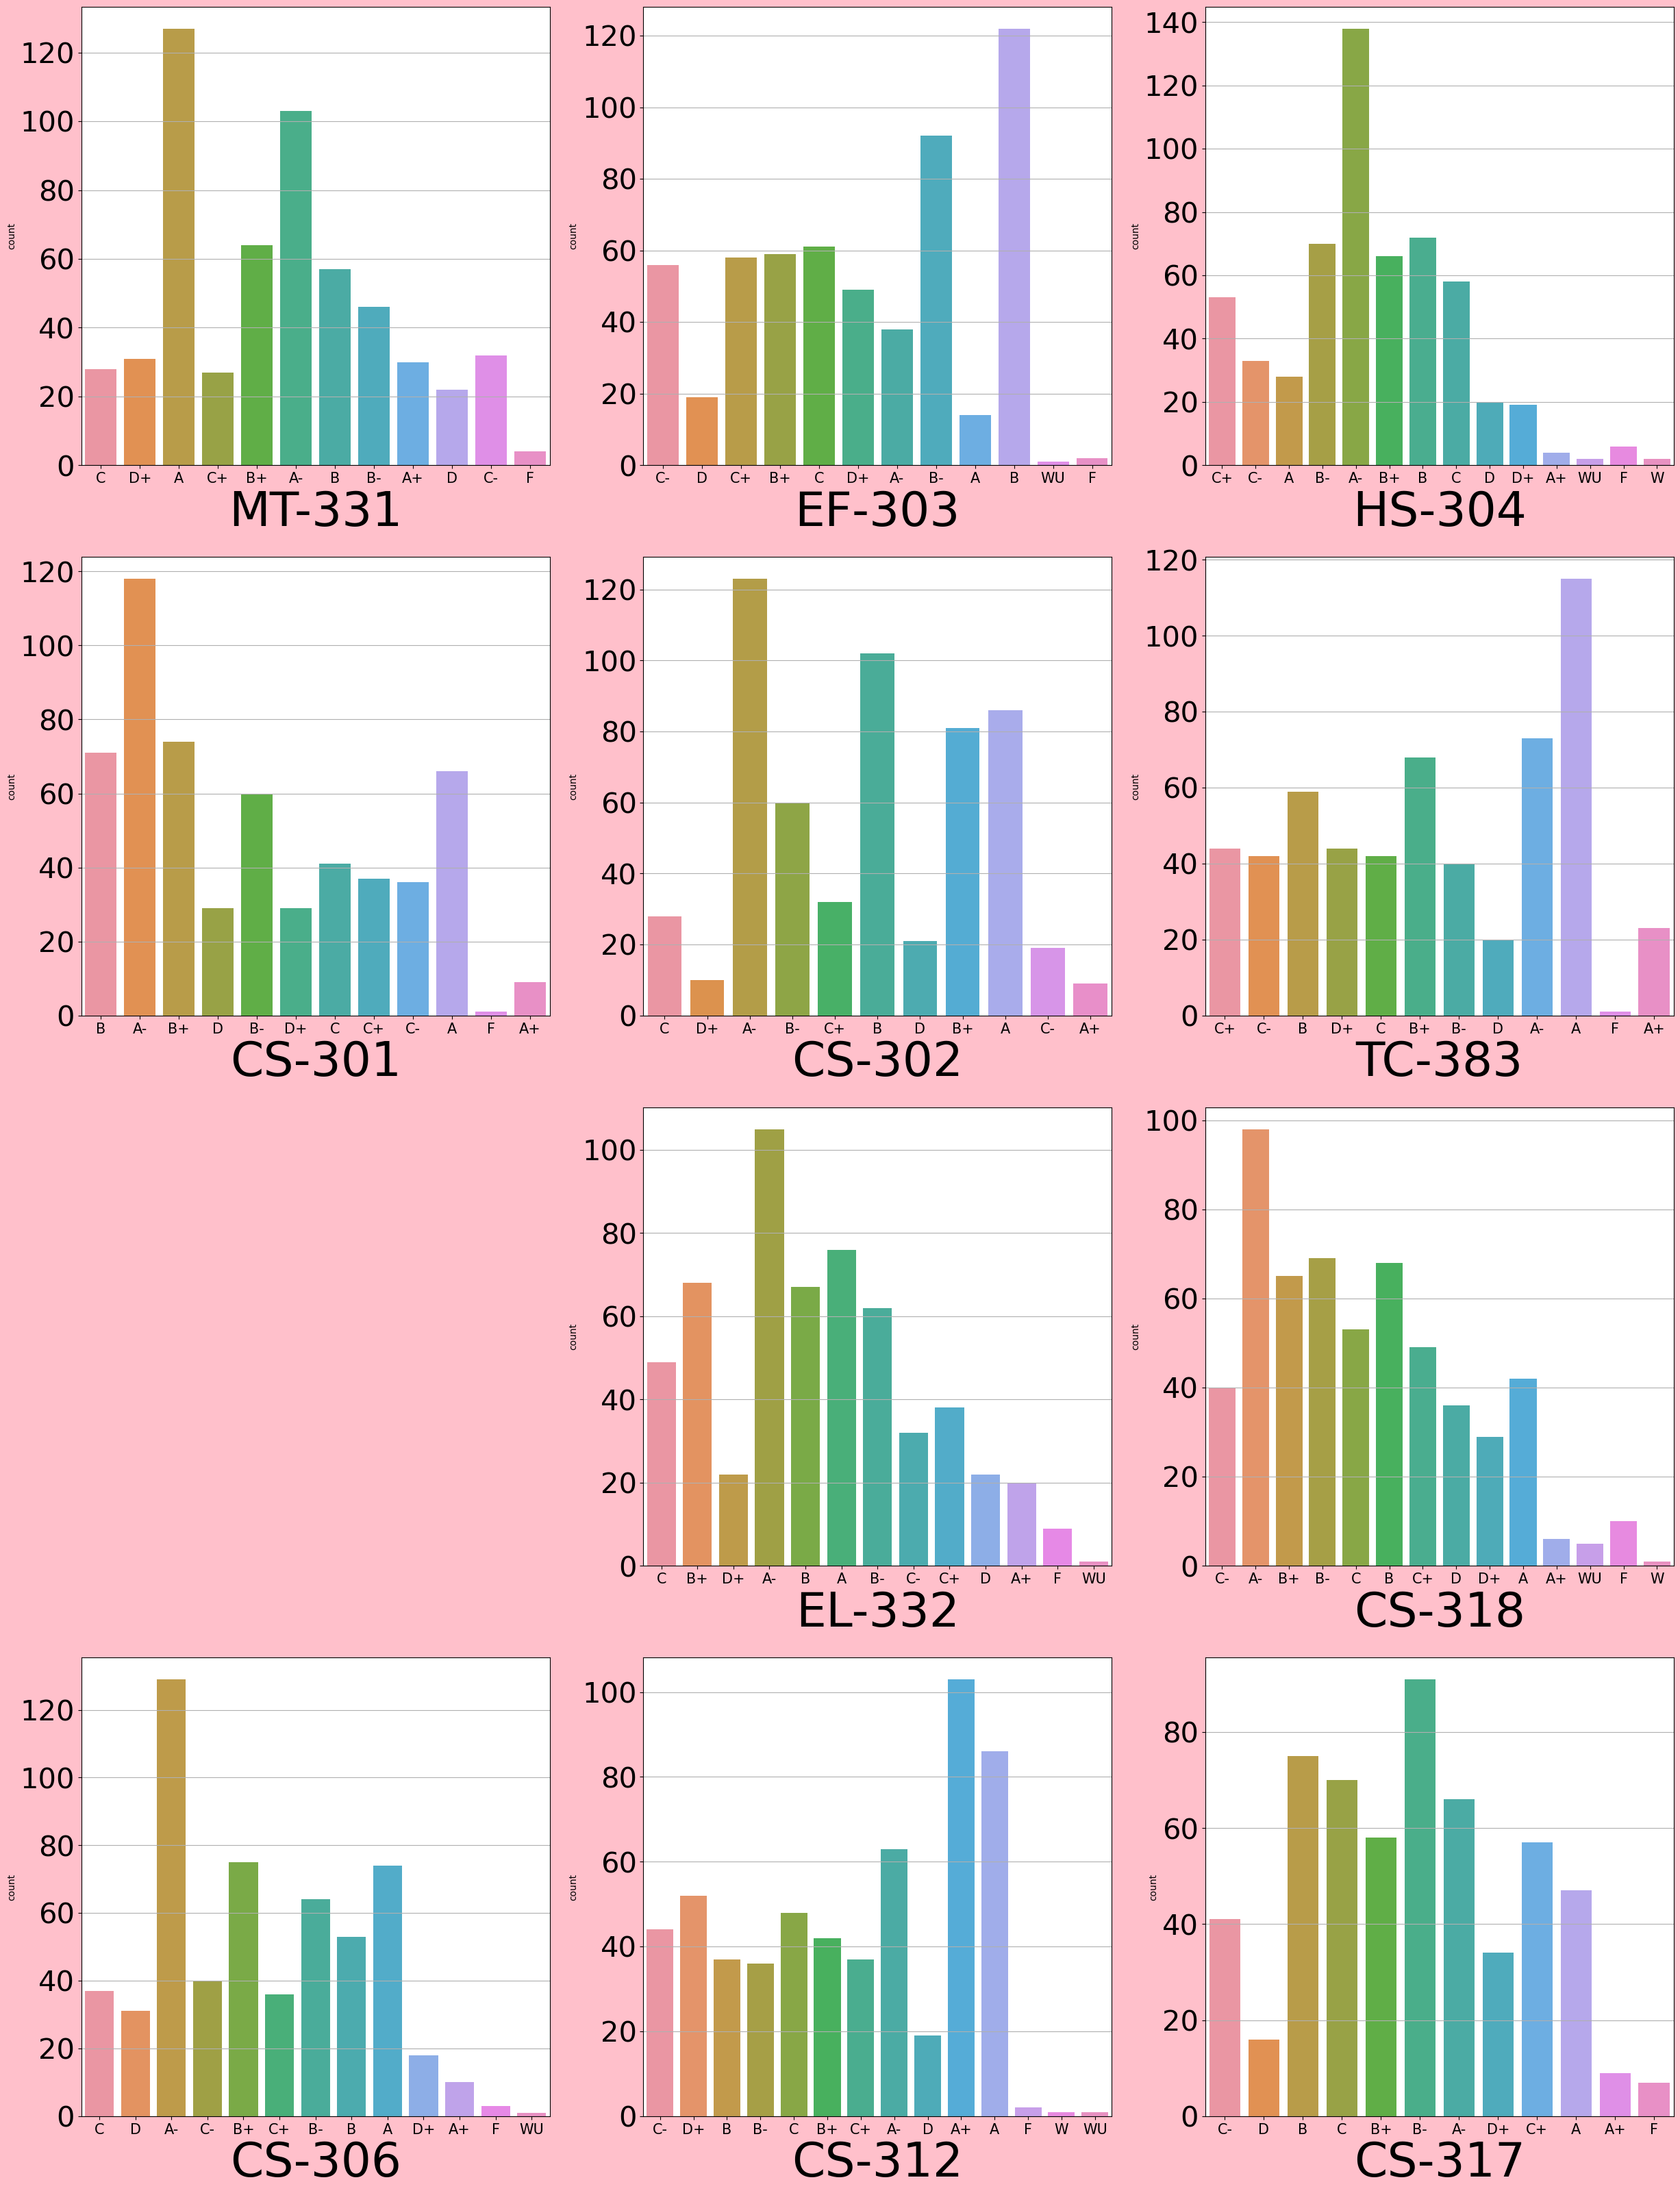

In [16]:
plt.figure(figsize=(30, 40), facecolor="pink")
plotnumber = 1
for i in df.columns:
    if 22 < plotnumber <= 34 and i != 'MT-442':  
        ax = plt.subplot(4, 3, plotnumber - 22)  
        sns.countplot(x=df[i], data=df)
        plt.xlabel(i, fontsize=50)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis ='y')
    plotnumber += 1

plt.show()



Here we can observe -

MT-331 - most student has A and A- and less student has F

EF-303 - most student has B and B- and very less student has F

HS-304 - most student has A- and comparitevely more student have F

CS-301 -  most student has A- and very less student has F

CS-302  - most student has A- and B and no student has F

TC-383 -  most student has A  and  very less student has F

EL-332 -  most student has A- and comparitevely more student have F

CS-318 - most student has A- and comparitevely more student have F

CS-306 - most student has A- and less student has F

CS-312 - most student has A+ and A- and   very less student has F

CS-317 - most student has B , C and B- and comparitevely more student have F

#### ----- graphs for fourth  year student 

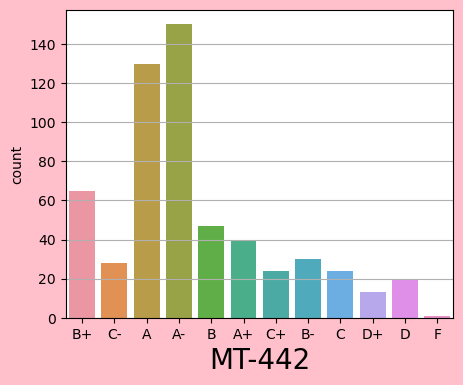

In [53]:
plt.figure(figsize=(5,4), facecolor="pink")
sns.countplot(x = 'MT-442', data= df)
plt.grid(axis ='y')
plt.xlabel( 'MT-442', fontsize=20)
plt.show()

here we can observe that most student has A and A- and  very less student has F

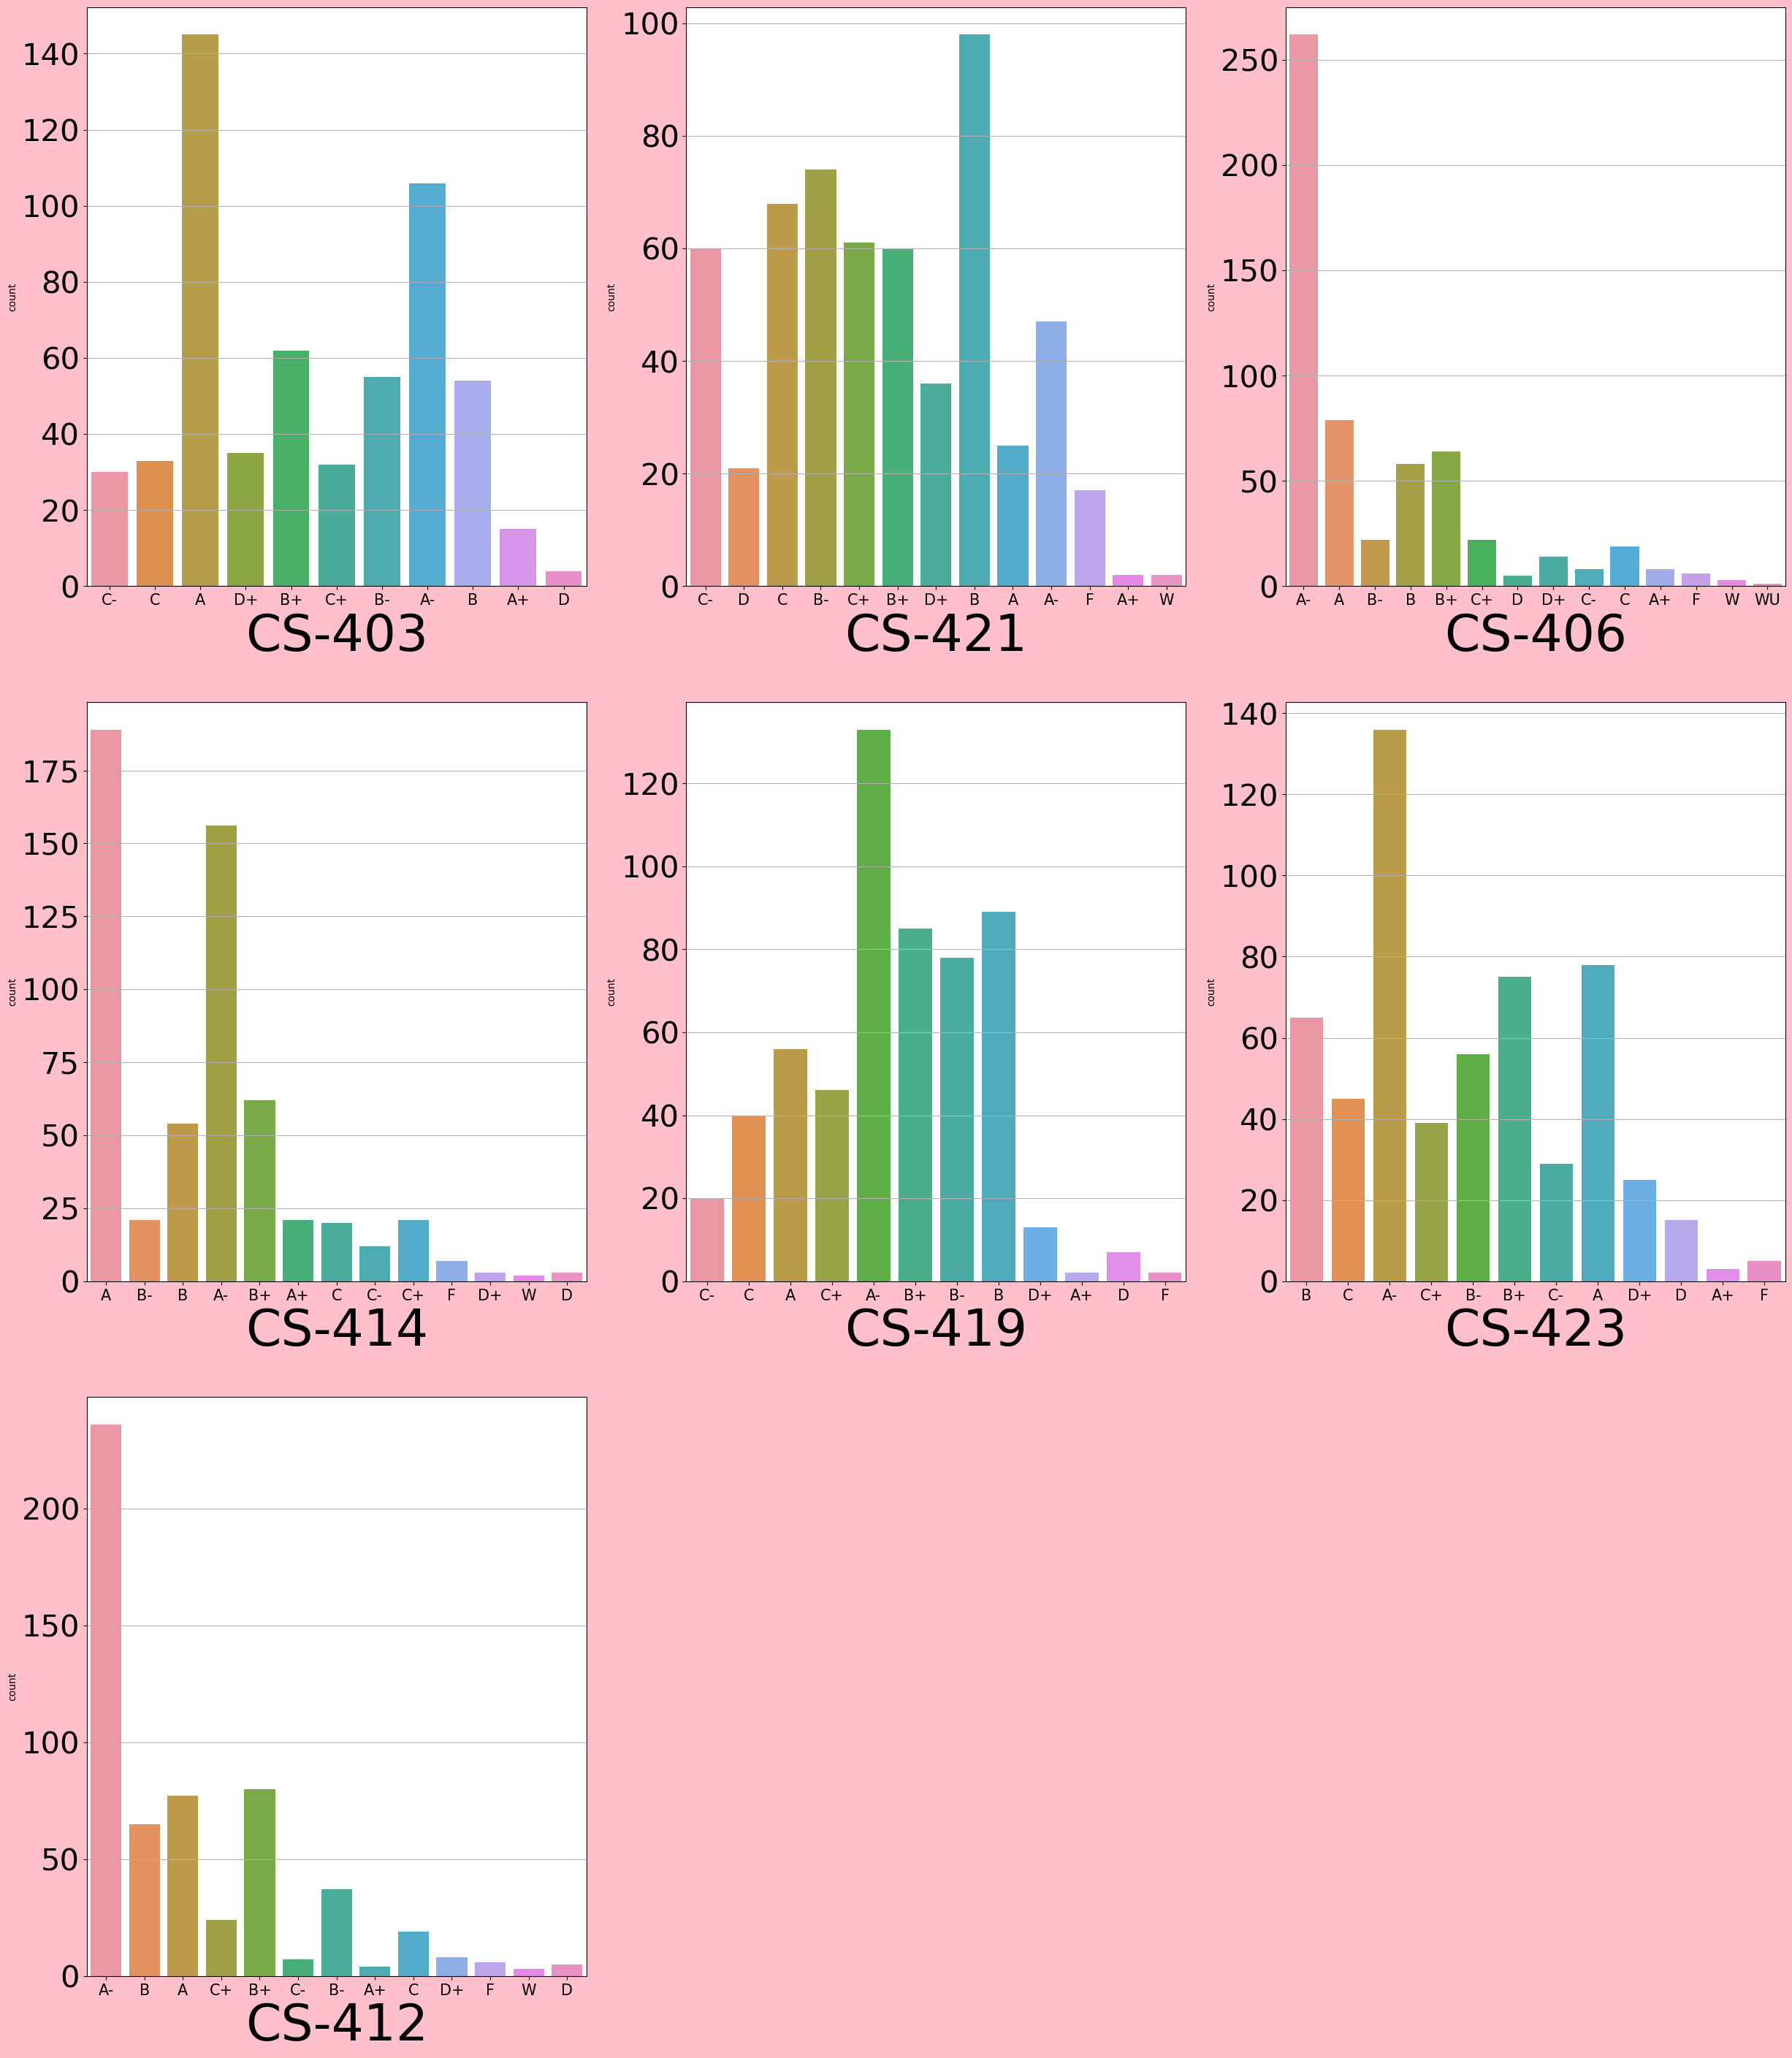

In [58]:
plt.figure(figsize=(30, 35), facecolor="pink")
plotnumber = 1
for i in df.columns:
    if 34 < plotnumber <= 41:  
        ax = plt.subplot(3, 3, plotnumber - 34)  
        sns.countplot(x=df[i], data=df)
        plt.xlabel(i, fontsize=50)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis ='y')
    plotnumber += 1
    

plt.show()

here we can observe - 

CS-403 most student has A and A- and no has F

CS-421 - most student has B and comparitevely more student have F

CS-406 - most student has A- and very less student has F

CS-414 - most student has A and A- and very less student has F

CS-419 - most student has A- and very less student has F

CS-423 - most student has A- and very less student has F

CS-412 -  most student has A- and very less student has F

-- BIVARIATE ANALYSIS

#### ----- graphs for first year student 

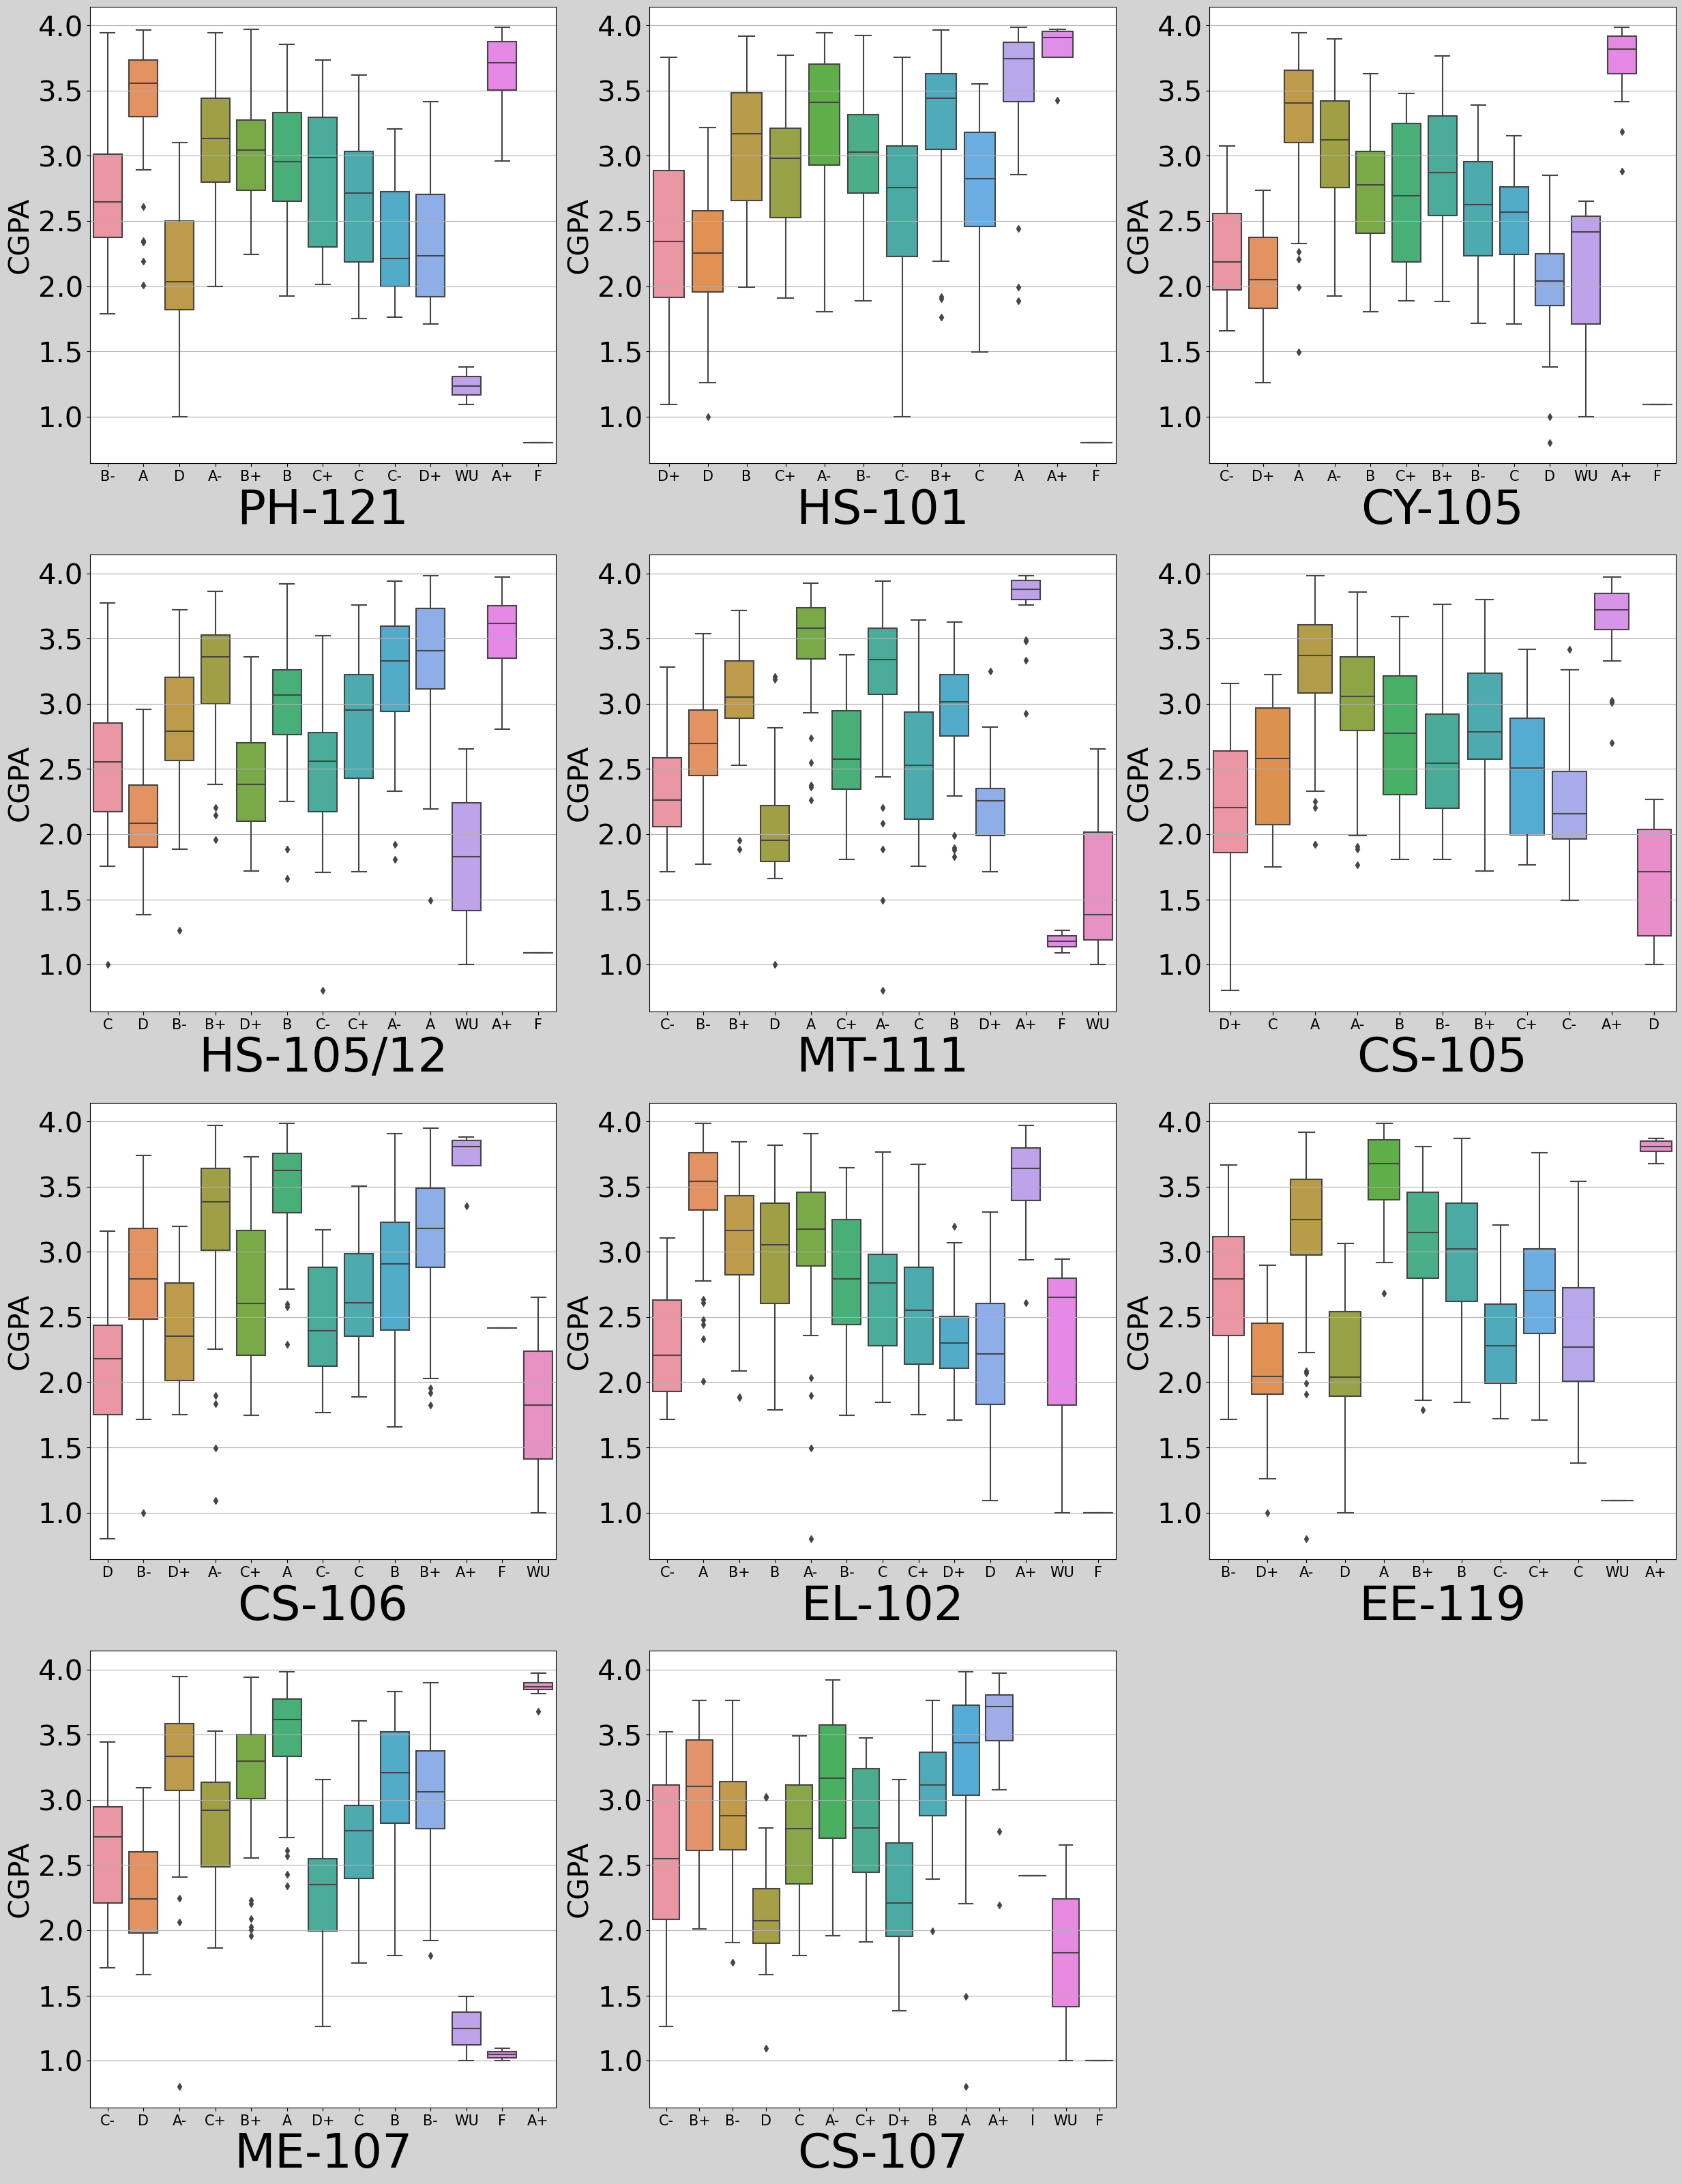

In [54]:
plt.figure(figsize=(30, 40), facecolor="lightgrey")
plotnumber = 1

for i in df.columns:
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.boxplot(x=df[i], y='CGPA', data=df )
        plt.xlabel(i, fontsize=50)
        plt.ylabel('CGPA', fontsize=30)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis='y')
    plotnumber += 1

plt.show()

Here we can observe that in first year - 

in all the columns  that Students who have A,A+,A- most of them have CGPA higher than all other students 


#### ----- graphs for second year student 

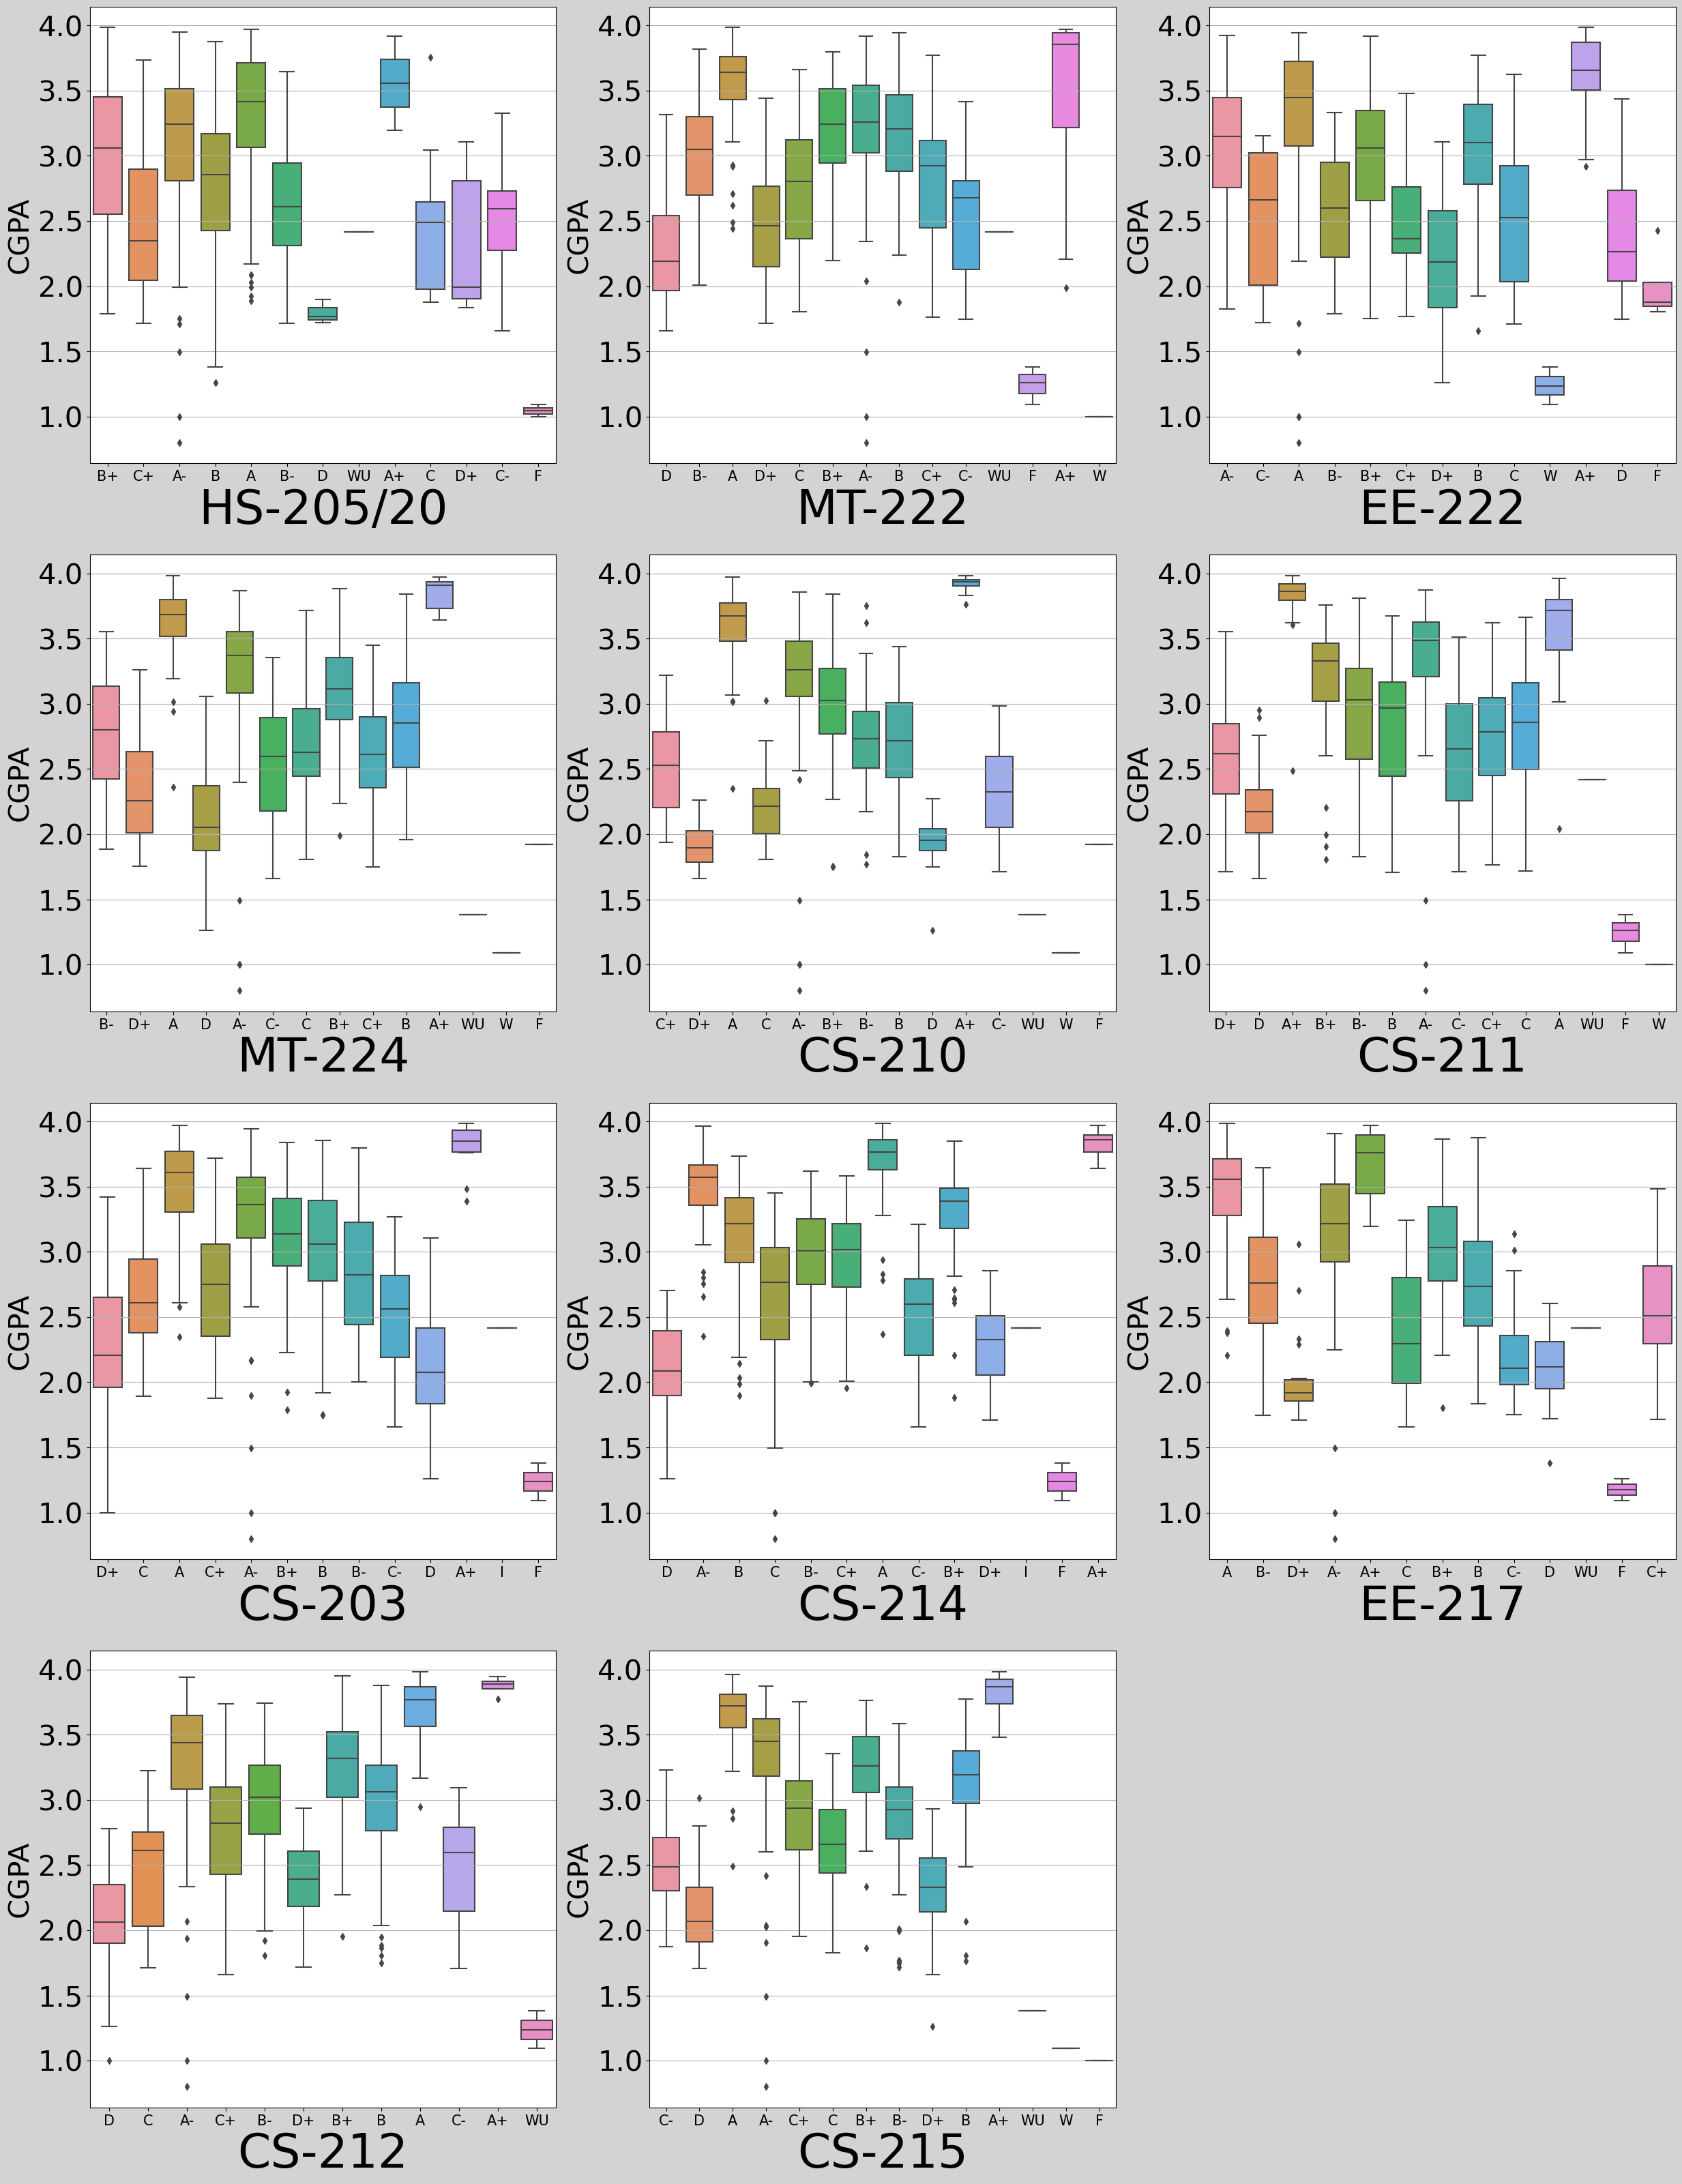

In [59]:
plt.figure(figsize=(30, 40), facecolor="lightgrey")
plotnumber = 1
for i in df.columns:
    if 11 < plotnumber <= 22:  
        ax = plt.subplot(4, 3, plotnumber - 11)  
        sns.boxplot(x=df[i], y='CGPA', data=df )
        plt.xlabel(i, fontsize=50)
        plt.ylabel('CGPA', fontsize=30)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis ='y')
    plotnumber += 1

plt.show()


Here we can observe that in second year - 

in all the columns  that Students who have A,A+,A- most of them have CGPA higher than all other students 


#### ----- graphs for third  year student 

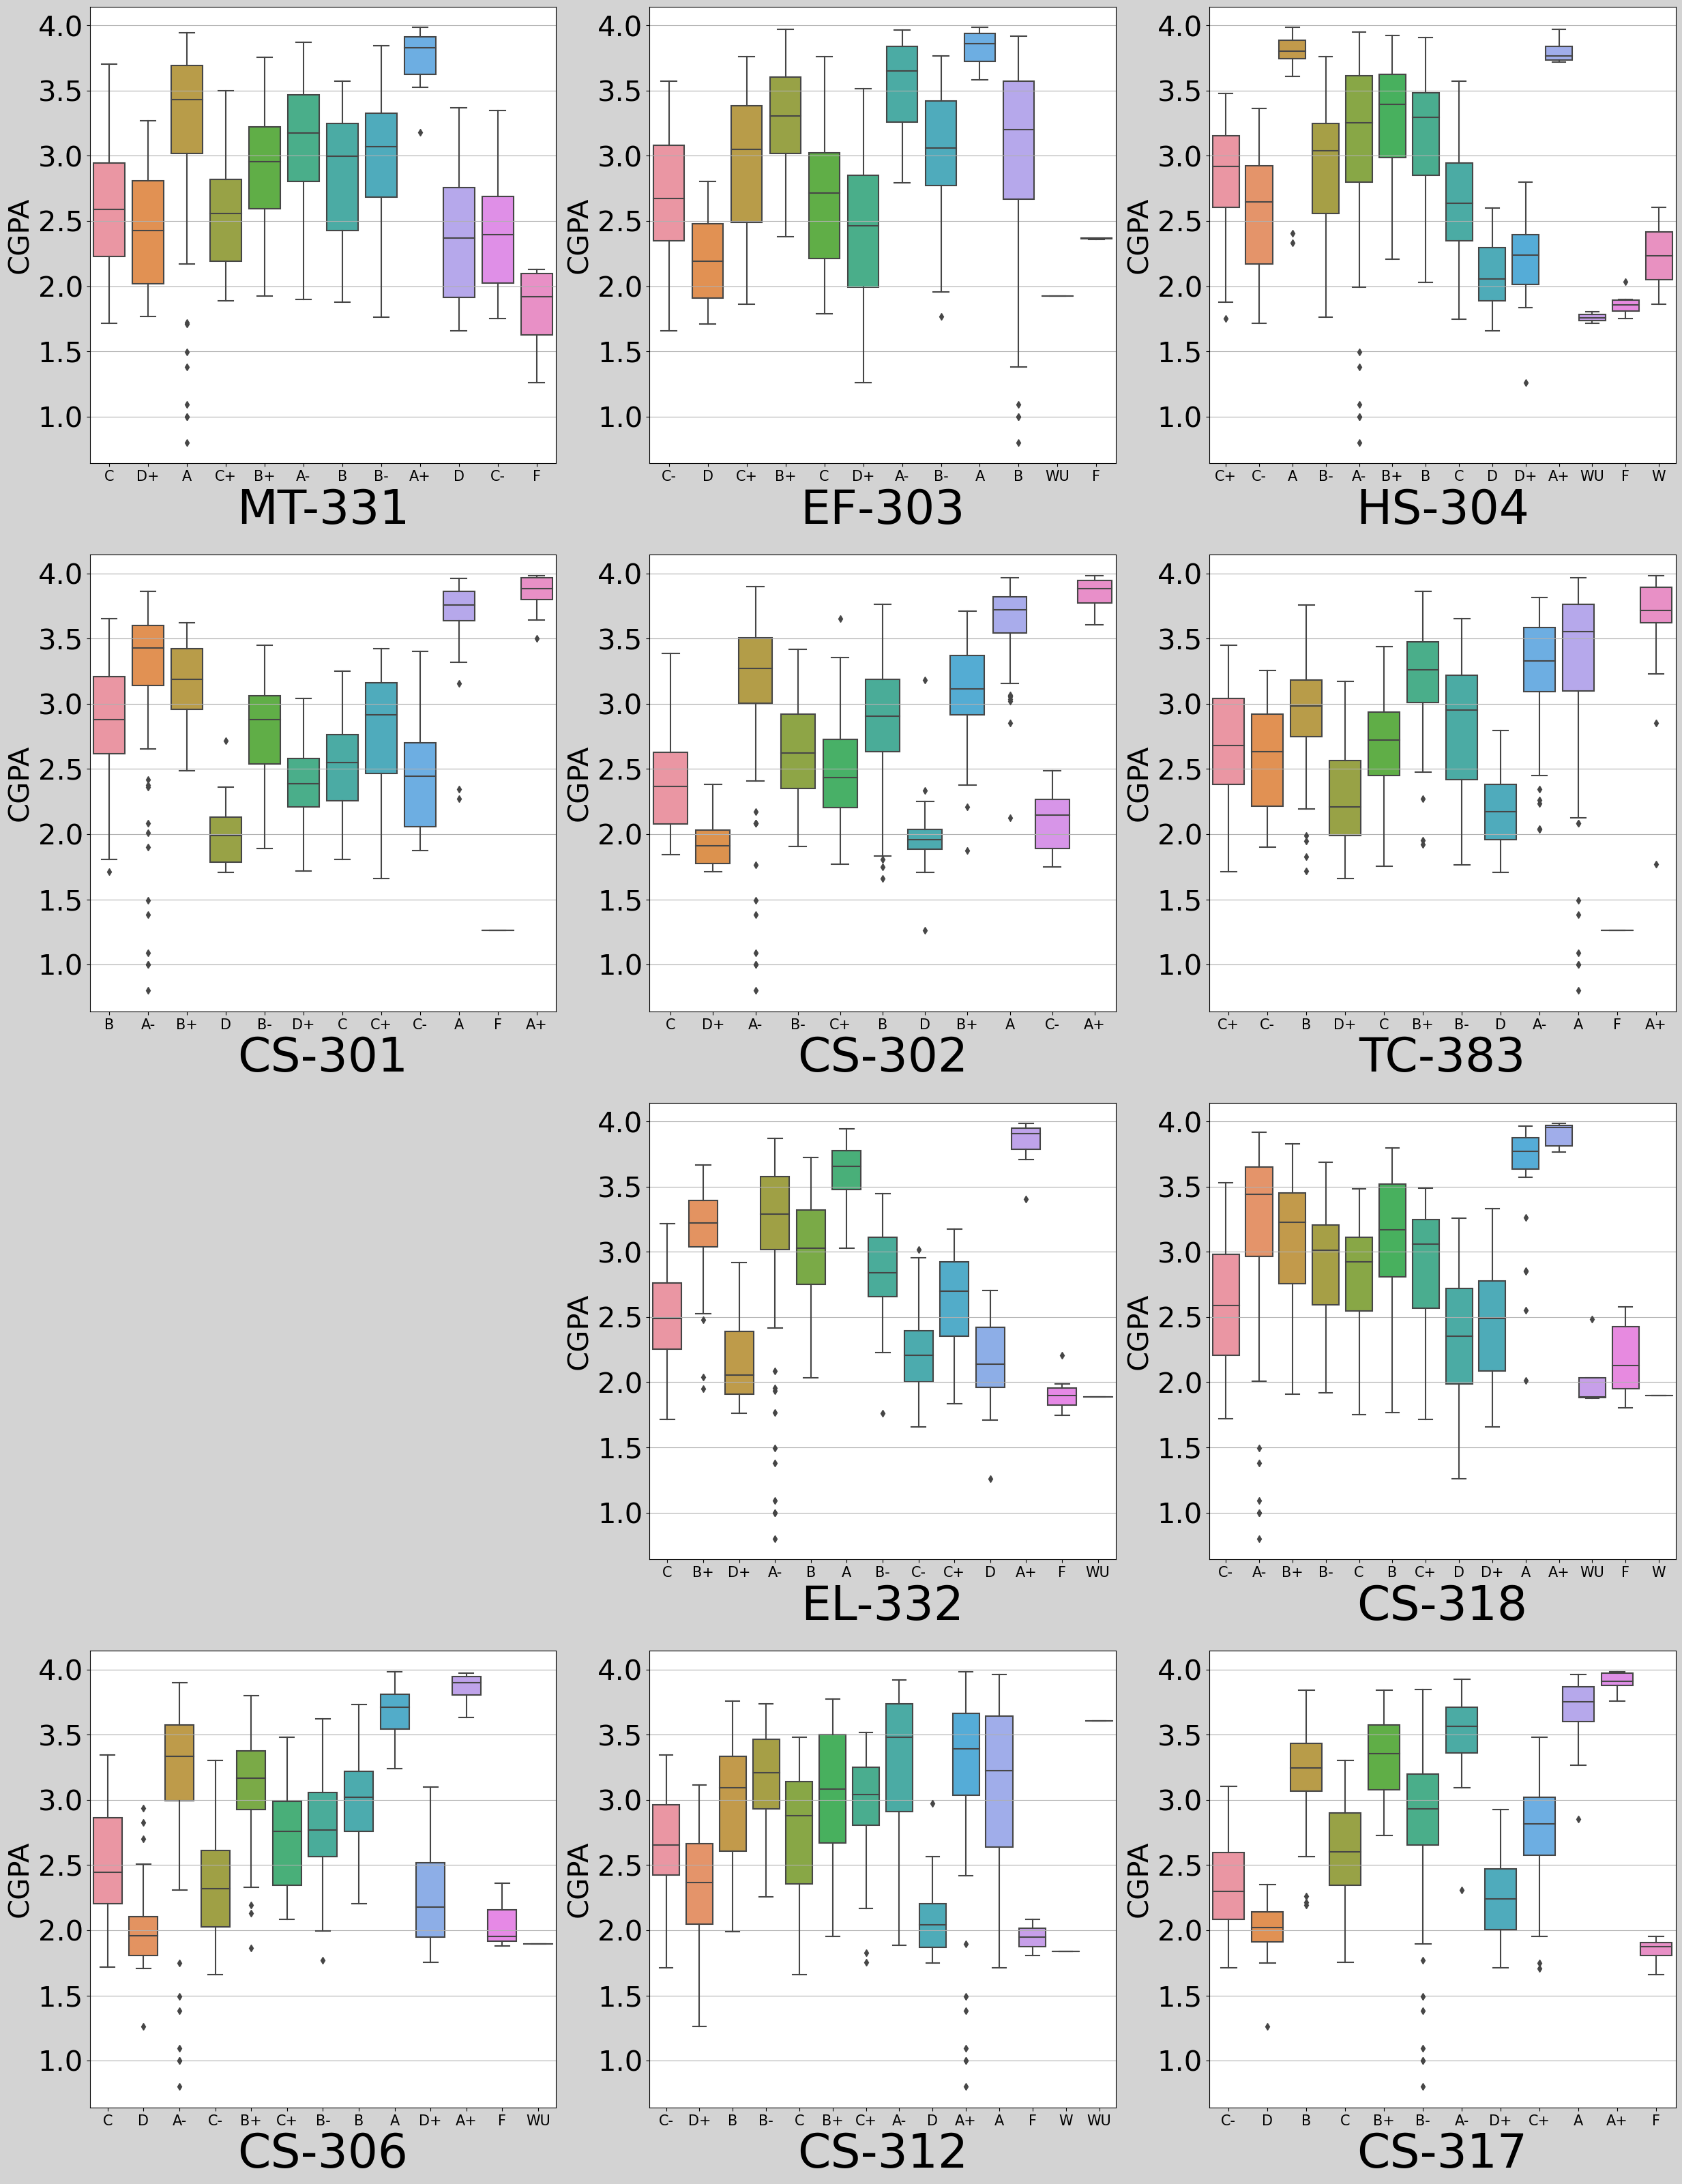

In [60]:
plt.figure(figsize=(30, 40), facecolor="lightgrey")
plotnumber = 1
for i in df.columns:
    if 22 < plotnumber <= 34 and i != 'MT-442':  
        ax = plt.subplot(4, 3, plotnumber - 22)  
        sns.boxplot(x=df[i], y='CGPA', data=df )
        plt.xlabel(i, fontsize=50)
        plt.ylabel('CGPA', fontsize=30)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis ='y')
    plotnumber += 1

plt.show()



Here we can observe that in third  year - 

in all the columns  that Students who have A,A+,A- most of them have CGPA higher than all other students 


#### ----- graphs for fourth year student 

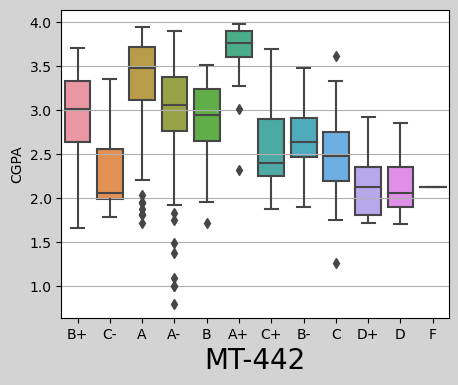

In [50]:
plt.figure(figsize=(5,4), facecolor="lightgrey")
sns.boxplot(x='MT-442', y='CGPA', data=df )
plt.grid(axis ='y')
plt.xlabel( 'MT-442', fontsize=20)
plt.show()

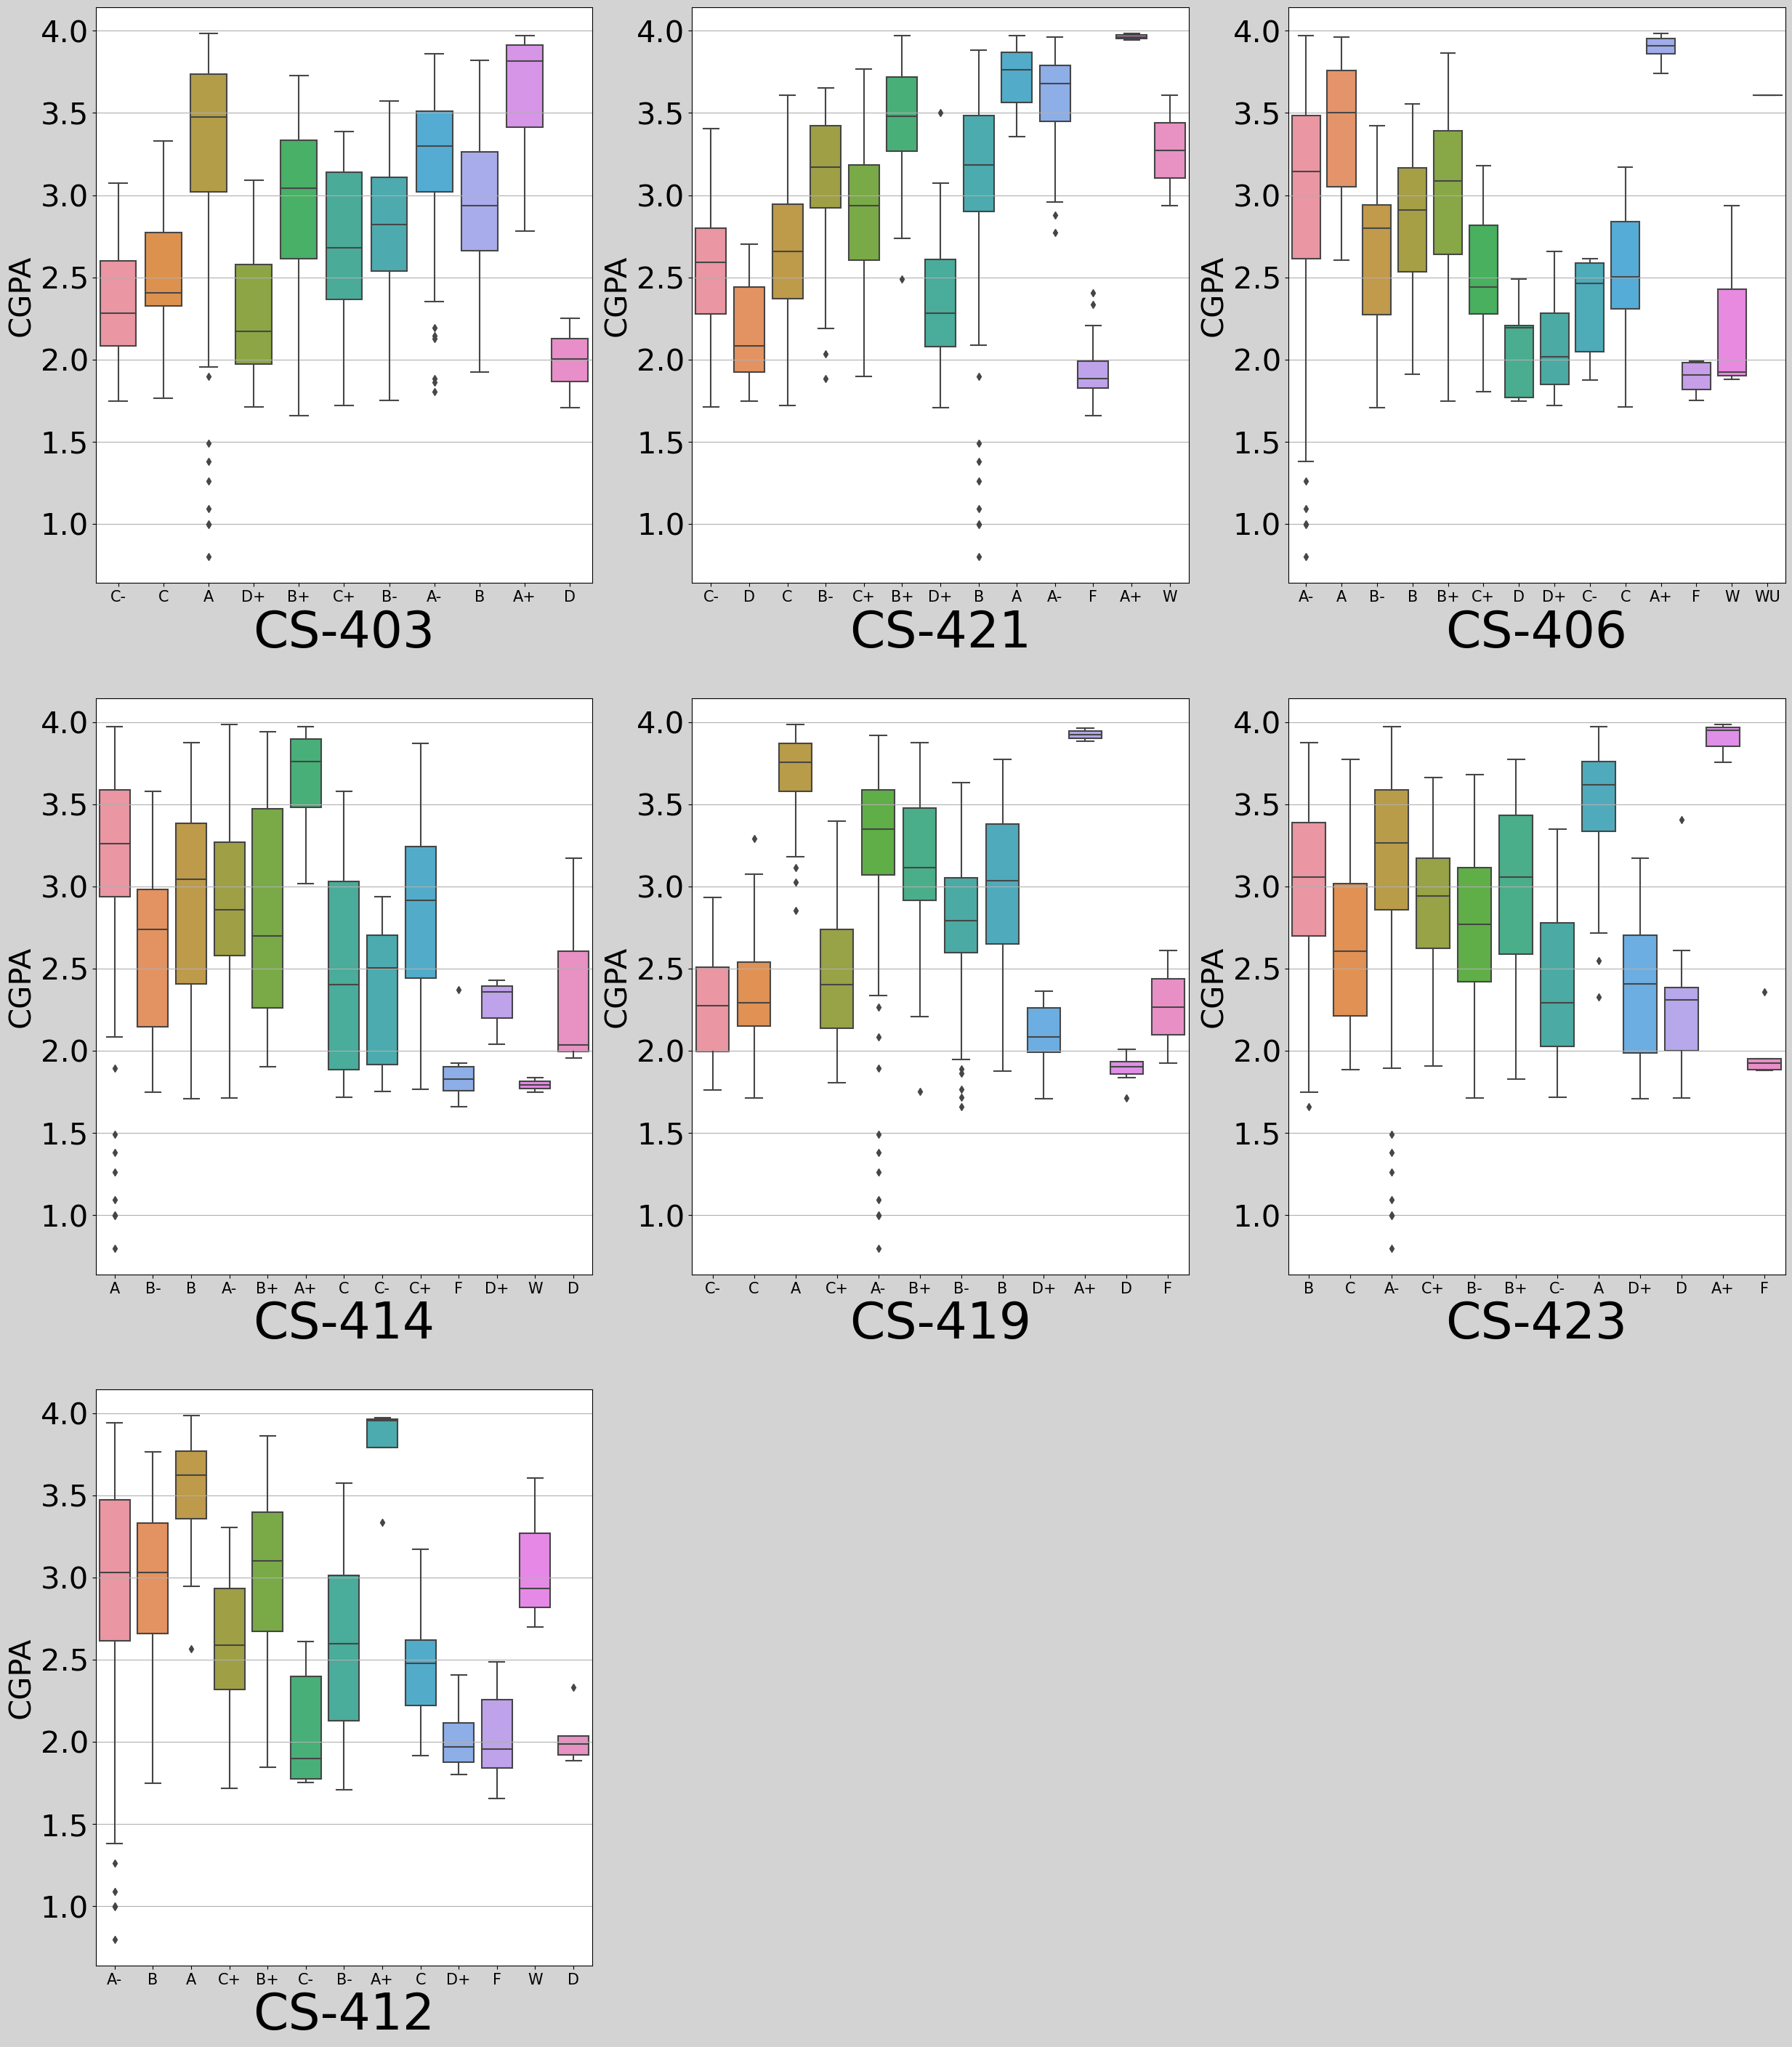

In [61]:
plt.figure(figsize=(30, 35), facecolor="lightgrey")
plotnumber = 1
for i in df.columns:
    if 34 < plotnumber <= 41:  
        ax = plt.subplot(3, 3, plotnumber - 34)  
        sns.boxplot(x=df[i], y='CGPA', data=df )
        plt.xlabel(i, fontsize=50)
        plt.ylabel('CGPA', fontsize=30)
        plt.xticks(fontsize=15)  
        plt.yticks(fontsize=30)
        plt.grid(axis ='y')
    plotnumber += 1
    

plt.show()

Here we can observe that in fourth year - 

in all the columns  that Students who have A,A+,A- most of them have CGPA higher than all other students 


as data is all categorical so we will not check for correalation and skewness.

#### Encoding data

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])


### Seperating features and target variable

In [23]:
X=  df.drop(['CGPA'], axis = 1)
Y=df['CGPA'] 

### Scaling using Standard Scalar

In [24]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = pd.DataFrame(SS.fit_transform(X), columns = X.columns)
X

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.722261,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,-0.399094,-0.960095,1.740513,-0.346121,-0.450178
1,-1.242052,1.411559,2.397448,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,-0.399094,1.042149,0.900418,0.727983,-0.021043
2,-1.242052,-0.744483,-0.978490,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-1.210063,-0.960095,-1.619869,-0.704156,-1.308446
3,1.714365,0.692879,2.397448,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.817361,0.241251,1.320466,1.086017,1.695494
4,-0.585070,-1.103823,-0.303302,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,-0.399094,-0.960095,-0.779774,-0.704156,-1.308446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-0.978490,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-1.210063,0.641700,0.060322,-0.346121,-1.308446
567,-0.913561,-1.822504,-0.978490,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,-0.399094,0.241251,-0.779774,0.727983,-0.450178
568,-0.256579,-1.822504,-0.303302,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-1.210063,1.442597,0.060322,-0.704156,-0.450178
569,-1.242052,-0.385142,2.059854,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,2.439300,1.442597,-0.359726,0.369948,1.266360


## Creating train test Split

In [25]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    X_train,X_test,Y_train,Y_test =train_test_split (X,Y, test_size = 0.25 , random_state = i)

#### importing necessary libraries for models

In [27]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor 
LR = LinearRegression()
RIG= Ridge()
SVM=SVR()
RFR=RandomForestRegressor()
DTR = DecisionTreeRegressor()
abr = AdaBoostRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## Models

#### Ridge

In [28]:
RIG.fit(X_train, Y_train)
y_pred = RIG.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9674658968788665


In [29]:
y_pred_testRIG  = RIG.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRIG ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8112705944937973


In [30]:
mae = mean_absolute_error(Y_test, y_pred_testRIG)
mse = mean_squared_error(Y_test, y_pred_testRIG)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.11393756399386405
Mean Squared Error -->: 0.07915976811963225
Root Mean Squared Error-->: 0.28135345762871344


#### Support vector Regression (svr)

In [31]:
SVM.fit(X_train, Y_train)
y_pred = SVM.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9803869833644777


In [32]:
y_pred_testSVM  = SVM.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testSVM ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8078147775133551


In [33]:
mae = mean_absolute_error(Y_test, y_pred_testSVM)
mse = mean_squared_error(Y_test, y_pred_testSVM)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.11509788018509835
Mean Squared Error -->: 0.08060925962892813
Root Mean Squared Error-->: 0.28391769868912387


#### Linear Regression

In [34]:
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.967466257862691


In [36]:
y_pred_testLR  = LR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testLR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8113370621716299


In [37]:
mae = mean_absolute_error(Y_test, y_pred_testLR)
mse = mean_squared_error(Y_test, y_pred_testLR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.11408184848536629
Mean Squared Error -->: 0.0791318892315991
Root Mean Squared Error-->: 0.2813039090229624


#### DecisionTreeRegressor

In [38]:
DTR.fit(X_train, Y_train)
y_pred = DTR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 1.0


In [39]:
y_pred_testDTR  = DTR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testDTR ) # checking test data 
print('r2 score of test data--->', R2_score)


r2 score of test data---> 0.6569723119051389


In [40]:
mae = mean_absolute_error(Y_test, y_pred_testDTR)
mse = mean_squared_error(Y_test, y_pred_testDTR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.22526573426573426
Mean Squared Error -->: 0.14387790909090908
Root Mean Squared Error-->: 0.37931241620979017


#### AdaBoost Regressor

In [42]:
abr.fit(X_train, Y_train)
y_pred = abr.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9446015255970346


In [43]:
y_pred_testABR  = abr.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testABR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.7937570669966448


In [44]:
mae = mean_absolute_error(Y_test, y_pred_testABR)
mse = mean_squared_error(Y_test, y_pred_testABR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.18115706888164745
Mean Squared Error -->: 0.08650555915793356
Root Mean Squared Error-->: 0.2941182740972304


#### Random Forest Regressor

In [46]:
RFR.fit(X_train, Y_train)
y_pred = RFR.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.989073076551617


In [47]:
y_pred_testRFR  = RFR.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.8132935999835648


In [48]:
mae = mean_absolute_error(Y_test, y_pred_testRFR)
mse = mean_squared_error(Y_test, y_pred_testRFR)
rmse = np.sqrt(mse)

print("Mean Absolute Error-->", mae)
print("Mean Squared Error -->:", mse)
print("Root Mean Squared Error-->:", rmse)

Mean Absolute Error--> 0.1450746853146852
Mean Squared Error -->: 0.07831124827692305
Root Mean Squared Error-->: 0.2798414699020198


we will further understand which model is best predicting by using cross validation method 

## Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
cscore1 = cross_val_score(abr,X,Y)
print('Cscore for AdaBoost Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for AdaBoost Regressor->  [0.86591764 0.89075769 0.89223195 0.87793582 0.78261668]
mean of cscore->  0.8618919568365504
difference between R2 and cross validation score is -0.06813488983990557


In [52]:
cscore1 = cross_val_score(LR,X,Y)
print('Cscore for Linaer Regression -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testLR)-cscore1.mean())

Cscore for Linaer Regression ->  [0.8927601  0.93427094 0.90082619 0.94061762 0.84878197]
mean of cscore->  0.9034513625626616
difference between R2 and cross validation score is -0.09211430039103163


In [53]:
cscore1 = cross_val_score(SVM,X,Y)
print('Cscore for Support Vector Model -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testABR)-cscore1.mean())

Cscore for Support Vector Model ->  [0.89656309 0.92627299 0.90977131 0.9411797  0.85204761]
mean of cscore->  0.9051669400105776
difference between R2 and cross validation score is -0.11140987301393279


In [54]:
cscore1 = cross_val_score(DTR,X,Y)
print('Cscore for Decision Tree Regressor -> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testDTR)-cscore1.mean())

Cscore for Decision Tree Regressor ->  [0.8198729  0.78700843 0.87722988 0.77361279 0.73466787]
mean of cscore->  0.7984783737190263
difference between R2 and cross validation score is -0.14150606181388736


In [55]:
cscore1 = cross_val_score(RFR,X,Y)
print('Cscore for RandomForest Regressor-> ',cscore1)
print('mean of cscore-> ',cscore1.mean())
print('difference between R2 and cross validation score is',r2_score(Y_test,y_pred_testRFR)-cscore1.mean())

Cscore for RandomForest Regressor->  [0.90839188 0.92277699 0.93926513 0.92528476 0.85210548]
mean of cscore->  0.909564848015944
difference between R2 and cross validation score is -0.09627124803237919


##### after analysing cross value score we can conclude   RandomForest Regressor  score is good i.e. 90.95% with least deviation of only 9.6% so we choose RandomForest Regressor

## Hyper parameter tuning

In [56]:
RFR.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [57]:
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['mse', 'mae'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
}


In [58]:
GSC = GridSearchCV(RandomForestRegressor(),parameters,cv= 5)

In [59]:
GSC.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [60]:
GSC.best_params_

{'criterion': 'mse',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [62]:
RFR_final = RandomForestRegressor(criterion= 'mse',max_depth = 30,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators = 200)
RFR_final.fit(X_train, Y_train)
y_pred = RFR_final.predict(X_train)
R2_score = r2_score( Y_train,y_pred ) # checking train data 
print("r2 score of trained data--->",R2_score) 

r2 score of trained data---> 0.9913919816702051


In [63]:
y_pred_testRFR  = RFR_final.predict(X_test)
R2_score = r2_score( Y_test, y_pred_testRFR ) # checking test data 
print('r2 score of test data--->', R2_score)

r2 score of test data---> 0.815970867804668


we can see after hyperparametertuning there is very slightly increase in the accuracy

## Model Saving

In [67]:
import joblib
joblib.dump(RFR_final,'Student grade prediction report')

['Student grade prediction report']

# Prediction 

In [68]:
mymodel = joblib.load('Student grade prediction report')
prdt = mymodel.predict(X_test)
prdt

array([2.608895, 3.73952 , 3.716285, 2.83194 , 2.662455, 2.22775 ,
       2.64109 , 2.67384 , 2.88408 , 3.067925, 2.80793 , 3.50385 ,
       1.995925, 3.087135, 2.844615, 2.48327 , 3.15373 , 2.373595,
       3.727635, 3.152895, 3.72413 , 3.55555 , 2.93846 , 2.497255,
       3.33739 , 3.137745, 2.734015, 3.44705 , 3.382675, 3.384185,
       3.034845, 3.58095 , 3.057265, 3.79662 , 3.30611 , 2.11831 ,
       3.147665, 3.63742 , 2.62547 , 2.01498 , 3.37136 , 3.645565,
       3.47296 , 2.37999 , 3.608925, 2.178195, 3.293705, 3.74628 ,
       2.68252 , 3.16521 , 3.15974 , 2.88481 , 2.451295, 3.03302 ,
       2.784345, 3.547475, 2.175925, 3.5615  , 2.30361 , 2.47372 ,
       2.69858 , 3.09576 , 3.43599 , 3.4763  , 3.6208  , 3.207145,
       2.47972 , 3.74779 , 3.29121 , 3.37588 , 2.886635, 3.073205,
       3.20966 , 2.051365, 2.676305, 2.33539 , 2.724275, 3.54922 ,
       3.378955, 3.89037 , 2.393265, 3.22994 , 2.06956 , 2.927455,
       3.231155, 3.473725, 2.166345, 2.632055, 2.465375, 1.956

## comparing from original 

In [69]:
a = np.array(Y_test)
data1 = pd.DataFrame({'predicted': prdt,'original':a})
data1

,predicted,original
0,2.608895,2.193
1,3.739520,3.798
2,3.716285,3.806
3,2.831940,2.845
4,2.662455,2.648
...,...,...
138,3.130615,3.218
139,3.420445,3.416
140,3.159050,3.182
141,2.606190,2.611


--we can see the prediction based on the model , we can see that CGPA predicated by the model is approx similar to orginal 